### Business Problem Statement:

We want to build a model to identify profitable customer segments for cross-selling personal loans at MyBank. The bank executed a pilot campaign, sending offers for personal loans with an attractive interest rate of 12% and a waived processing fee to 20,000 customers via email, SMS, and direct mail. Out of these, 2,512 customers showed interest in the offer, indicated by the "TARGET" variable being marked as 1, while the remaining 17,488 customers did not respond positively.

Our goal is to analyze the data, which includes various demographic and behavioral variables, and identify customer segments that are likely to respond positively to the loan offer. The data will be pre-processed accordingly, and we will make necessary assumptions, such as the data being a Simple Random Sample, independently and identically distributed (i.i.d.), and normally distributed (or assuming normality based on the Central Limit Theorem). 

By developing a predictive model, we aim to find customer groups that are the most profitable to target for future cross-selling of personal loans.

### Importing the Libraries

In [1]:
# importing the necessary packages

# for numeric calculations
import numpy as np

# for data manipulation
import pandas as pd
from pylab import *

# for scientific statistics
import scipy
from scipy import stats

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# for machine learning
from sklearn.model_selection import train_test_split

# to get p values
from scipy.stats import shapiro

# for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, GenericUnivariateSelect, mutual_info_classif
from sklearn.decomposition import PCA

# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC

# for ensemble techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# for scikit metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score

# remove warnings
import warnings
warnings.filterwarnings(action='ignore')

### Importing the dataset

In [2]:
main_df = pd.read_csv('MyBank_DATA.csv')
df = pd.read_csv('MyBank_DATA.csv')

In [3]:
df.head().T

,0,1,2,3,4
CUST_ID,C7927,C6877,C19922,C8183,C12123
TARGET,0,0,0,0,0
AGE,27,47,40,53,36
GENDER,M,M,M,M,M
BALANCE,3383.75,287489,18216.9,71720.5,1.67162e+06
OCCUPATION,SELF_EMP,SAL,SELF_EMP,SAL,PROF
AGE_BKT,26-30,46-50,36-40,>50,36-40
SCR,776,324,603,196,167
HOLDING_PERIOD,30,28,2,13,24
ACC_TYPE,SA,SA,SA,CA,SA


### Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   AGE_BKT                   20000 non-null  object 
 7   SCR                       20000 non-null  int64  
 8   HOLDING_PERIOD            20000 non-null  int64  
 9   ACC_TYPE                  20000 non-null  object 
 10  ACC_OP_DATE               20000 non-null  object 
 11  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 12  NO_OF_L_CR_TXNS           20000 non-null  int64  
 13  NO_OF_L_DR_TXNS           20000 non-null  int64  
 14  TOT_NO

There doesn't seem to be any null values here. If special characters were used, we will not have so many int64 and float64 
datatypes.

We will check for them anyway.

In [5]:
df.isna().sum()

CUST_ID                     0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
AGE_BKT                     0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PE

There are no NULL values mentioned here as well. Now we will check for special characters as sometimes, special characters are used in the place of NaN values.

To do this, we need to check all the object type columns and parse the isalnum() method through them. If it is false in any of them, we will proceed to search for special characters.

#### Getting different column types: Categorical, Numerical and All

This will help us analyze the columns more efficiently.

In [6]:
all_cols = list(df.columns)
numeric_cols = list(df.select_dtypes(include=['int64','float64']).columns)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

print('All Columns:\n{}\n'.format(all_cols))
print('Numerical Columns:\n{}\n'.format(numeric_cols))
print('Categorical Columns:\n{}\n'.format(categorical_cols))

All Columns:
['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR', 'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN', 'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random']

Numerical Columns:
['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS

There are alot of numerical columns, but it looks like they are actually categorical as well. We will check them out later.

In [7]:
num_cols = ['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN', 'AVG_AMT_PER_MOB_TXN']

cat_cols = ['GENDER', 'OCCUPATION', 'AGE_BKT', 'ACC_TYPE','FLG_HAS_CC', 'FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN']

#### Checking for special symbols in column values

In [8]:
for i,col in enumerate(categorical_cols):
    val = df[col].str.isalnum()
    if val[i] == False:
        print('{} {}'.format(col, val[i]))
        continue

OCCUPATION False
AGE_BKT False
ACC_OP_DATE False


In [9]:
df['OCCUPATION'].value_counts()

SAL         5855
PROF        5417
SENP        5160
SELF_EMP    3568
Name: OCCUPATION, dtype: int64

No special symbols that signify inconsistency.

In [10]:
df['AGE_BKT'].value_counts()

26-30    3434
31-35    3404
41-45    3067
>50      3035
36-40    2814
46-50    2493
<25      1753
Name: AGE_BKT, dtype: int64

In [11]:
df['ACC_OP_DATE'].value_counts()

11/16/2010    24
04-03-2009    23
7/25/2010     22
05-06-2013    21
02-07-2007    20
              ..
7/30/2011      1
05-04-1999     1
10/17/2005     1
02-03-2005     1
11-09-2011     1
Name: ACC_OP_DATE, Length: 4869, dtype: int64

We see that there are no special characters symbolizing null values anywhere. But we do see that there are inconsistencies in the 'ACC_OP_DATE' column. We will fix that now.

#### Dealing with the inconsistency in the ACC_OP_DATE column

In [12]:
# date format changed to DD/MM/YYYY
df['ACC_OP_DATE'] = pd.to_datetime(df['ACC_OP_DATE']).dt.strftime('%d/%m/%y')

In [13]:
df['ACC_OP_DATE']

0        23/03/05
1        11/10/08
2        26/04/12
3        04/07/08
4        29/12/01
           ...   
19995    04/09/03
19996    03/05/13
19997    01/11/07
19998    22/08/06
19999    21/06/14
Name: ACC_OP_DATE, Length: 20000, dtype: object

Thus the 'ACC_OP_DATE' column has been formatted as specified.

#### Dealing with AGE_BKT column

AGE_BKT was unintuitive as it had values like <25 and >55. We will modify this column to make analysis easier

In [14]:
df['AGE_BKT'] = pd.cut(df['AGE'], [20,25,30,35,40,45,50,55])

In [15]:
df['AGE_BKT'].value_counts().sum()

20000

Thus the 'AGE_BKT' column has been formatted as specified

### Plotting the 5 Point Summary of the Numeric Columns

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


The 5 Point Summary shows us that alot of our numeric columns have large standard deviations and a large difference between the percentiles. This means our Data is skewed and has large outliers. We will have to deal with them.

(i) The 'BALANCE' column has a huge difference between the mean and 50% value, so there seems to be outliers existing in that column

(ii) The 'HOLDING_PERIOD' column has a mean of 15, which means that the customers who have a holding period of less than or equal to 15 days can be considered as those who might be interested in personal loans

(iii) Customers with larger number of transactions can also be considered to be in the market for loans

(iv) The 'AMT_OTH_BK_ATM_USG_CHGS' and 'AMT_MIN_BAL_NMC_CHGS' columns indicate the amount lost by the customer through fines due to their defaults in Bank's policies

(v) The 'NO_OF_IW_CHQ_BNC_TXNS' and 'NO_OF_OW_CHQ_BNC_TXNS' columns indicate whether the customer has defaulted in the Bank's Cheque Policies

We see that the min and max values of alot of these columns like 'BALANCE' are really large. These are extreme Outliers. We will have to scale them to accomodate these values and not lost information.

#### Feature Engineering - Combining and Modifying Columns

In [17]:
df['AMT_FINED'] = df['AMT_OTH_BK_ATM_USG_CHGS'] + df['AMT_MIN_BAL_NMC_CHGS'] # adding the charges into one column.

df['CHQ_FINED'] = df['NO_OF_IW_CHQ_BNC_TXNS'] + df['NO_OF_OW_CHQ_BNC_TXNS' ] # adding the fined? classifier into one column.

In [18]:
df['CHQ_FINED'].value_counts()

0    18304
1     1649
2       47
Name: CHQ_FINED, dtype: int64

In [19]:
# CHQ_FINED has to be either 0 or 1
df.loc[df['CHQ_FINED'] == 2, 'CHQ_FINED'] = 1

In [20]:
df['TOT_NO_OF_DR_TXNS'] = df['NO_OF_BR_CSH_WDL_DR_TXNS'] + df['NO_OF_ATM_DR_TXNS'] + df['NO_OF_NET_DR_TXNS'] + df['NO_OF_MOB_DR_TXNS'] + df['NO_OF_CHQ_DR_TXNS']

In [21]:
df['AMT_FINED'].value_counts()

0      19710
170      149
200       44
140       35
70        25
250       23
40        11
310        2
240        1
Name: AMT_FINED, dtype: int64

In [22]:
df['CHQ_FINED'].value_counts()

0    18304
1     1696
Name: CHQ_FINED, dtype: int64

### Columns' Relationship with TARGET

Before we start analysis, we need to see if the columns are related to the 'TARGET' column at all. If they are not, then there is no point in analyzing them.

#### Hypothesis

H0: TARGET Varaible is correlated to the Columns<br>
Ha: TARGET Varaible is not correlated to the Columns

In [23]:
df[df.columns[0:]].corr()['TARGET']

TARGET                      1.000000
AGE                         0.022977
BALANCE                    -0.067062
SCR                         0.078909
HOLDING_PERIOD             -0.135447
LEN_OF_RLTN_IN_MNTH        -0.023618
NO_OF_L_CR_TXNS             0.120284
NO_OF_L_DR_TXNS             0.122954
TOT_NO_OF_L_TXNS            0.134504
NO_OF_BR_CSH_WDL_DR_TXNS    0.101909
NO_OF_ATM_DR_TXNS           0.082359
NO_OF_NET_DR_TXNS           0.097071
NO_OF_MOB_DR_TXNS           0.054477
NO_OF_CHQ_DR_TXNS           0.103531
FLG_HAS_CC                  0.100513
AMT_ATM_DR                  0.083251
AMT_BR_CSH_WDL_DR           0.048360
AMT_CHQ_DR                  0.060796
AMT_NET_DR                  0.062121
AMT_MOB_DR                  0.083215
AMT_L_DR                    0.095351
FLG_HAS_ANY_CHGS            0.045783
AMT_OTH_BK_ATM_USG_CHGS     0.028417
AMT_MIN_BAL_NMC_CHGS        0.005053
NO_OF_IW_CHQ_BNC_TXNS       0.011601
NO_OF_OW_CHQ_BNC_TXNS       0.027411
AVG_AMT_PER_ATM_TXN         0.074995
A

NULL Hypothesis is rejected, Alternate Hypothesis is accepted.

We see that none of the columns are highly correlated with the 'TARGET' column. This is unfortunate. Now we will see the correlation of columns between each other.

Such low correlation can mean that these columns are not contributing to the TARGET column, but when grouped together they maybe related to the 'TARGET' column. Atleast Indirectly.

#### Hypothesis

In [24]:
df.corr() # Gives a dataframe of all the correlation of all numeric values

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random,AMT_FINED,CHQ_FINED,TOT_NO_OF_DR_TXNS
TARGET,1.000000,0.022977,-0.067062,0.078909,-0.135447,-0.023618,0.120284,0.122954,0.134504,0.101909,...,-0.002157,0.065239,0.025707,0.076258,0.011784,-0.011555,-0.001504,0.023266,0.029777,0.122954
AGE,0.022977,1.000000,-0.122587,-0.005871,-0.012060,-0.008279,0.030170,0.019602,0.028932,0.024266,...,-0.005078,0.014456,0.000079,0.028288,0.016856,0.010269,-0.004517,0.006280,-0.010966,0.019602
BALANCE,-0.067062,-0.122587,1.000000,-0.065300,0.039241,-0.000855,-0.047652,-0.043431,-0.051299,-0.034814,...,0.005807,-0.023732,-0.019149,-0.028727,-0.004205,-0.028707,-0.004026,-0.051930,-0.017531,-0.043431
SCR,0.078909,-0.005871,-0.065300,1.000000,-0.025174,0.009034,-0.013179,0.009389,-0.004952,0.004827,...,-0.022531,0.008267,0.025731,-0.015246,-0.001952,0.013333,0.008131,0.011692,0.002815,0.009389
HOLDING_PERIOD,-0.135447,-0.012060,0.039241,-0.025174,1.000000,0.011448,-0.008474,-0.347855,-0.156350,-0.196455,...,0.053490,-0.209996,-0.107639,-0.080625,-0.005034,-0.002751,-0.002089,-0.058255,-0.076772,-0.347855
LEN_OF_RLTN_IN_MNTH,-0.023618,-0.008279,-0.000855,0.009034,0.011448,1.000000,0.021719,0.001878,0.015777,-0.003073,...,0.007646,0.012910,-0.002317,0.000768,0.010750,-0.000576,0.003609,-0.010358,0.001261,0.001878
NO_OF_L_CR_TXNS,0.120284,0.030170,-0.047652,-0.013179,-0.008474,0.021719,1.000000,0.582878,0.936226,0.376076,...,-0.072481,0.296119,-0.070980,0.331736,0.003048,-0.001724,-0.006647,0.240361,0.030038,0.582878
NO_OF_L_DR_TXNS,0.122954,0.019602,-0.043431,0.009389,-0.347855,0.001878,0.582878,1.000000,0.831203,0.566711,...,-0.138214,0.496141,-0.040287,0.409491,0.000826,-0.003605,-0.005101,0.397274,0.106422,1.000000
TOT_NO_OF_L_TXNS,0.134504,0.028932,-0.051299,-0.004952,-0.156350,0.015777,0.936226,0.831203,1.000000,0.502433,...,-0.109383,0.417131,-0.065890,0.404073,0.002475,-0.002790,-0.006643,0.336172,0.066619,0.831203
NO_OF_BR_CSH_WDL_DR_TXNS,0.101909,0.024266,-0.034814,0.004827,-0.196455,-0.003073,0.376076,0.566711,0.502433,1.000000,...,-0.127145,0.137317,-0.045247,0.432037,0.008636,0.005678,0.001384,-0.002184,0.070049,0.566711


The given correlation dataframe is too large and hence it is difficult to see which columns are correlated. We'll just find out which of these columns have a high value and then check it.

In [25]:
def high_corr(dataframe, threshold):
    '''
    This function takes a dataframe and a user-specified threshold value and display those correlations that are above the speicified threshold. 
    '''
    corr_matrix = dataframe.corr()
    iters = range(len(corr_matrix.columns) - 1)
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            
            if abs(val) >= threshold:
                print('{} <---> {}: {}'.format(col.values[0],row.values[0],round(val[0][0],2)))
                
                
high_corr(df, 0.7) # calling the function with our dataframe and the threshold set as 0.7

TOT_NO_OF_L_TXNS <---> NO_OF_L_CR_TXNS: 0.94
NO_OF_ATM_DR_TXNS <---> NO_OF_L_DR_TXNS: 0.81
NO_OF_NET_DR_TXNS <---> NO_OF_L_DR_TXNS: 0.92
NO_OF_NET_DR_TXNS <---> TOT_NO_OF_L_TXNS: 0.77
NO_OF_MOB_DR_TXNS <---> NO_OF_L_DR_TXNS: 0.76
NO_OF_MOB_DR_TXNS <---> NO_OF_ATM_DR_TXNS: 0.77
AMT_ATM_DR <---> NO_OF_ATM_DR_TXNS: 0.71
AMT_L_DR <---> AMT_CHQ_DR: 0.73
AMT_OTH_BK_ATM_USG_CHGS <---> NO_OF_ATM_DR_TXNS: 0.84
AMT_OTH_BK_ATM_USG_CHGS <---> NO_OF_MOB_DR_TXNS: 0.81
AVG_AMT_PER_ATM_TXN <---> AMT_ATM_DR: 0.72
AVG_AMT_PER_CSH_WDL_TXN <---> AMT_BR_CSH_WDL_DR: 0.78
AVG_AMT_PER_CHQ_TXN <---> AMT_CHQ_DR: 0.9
AVG_AMT_PER_NET_TXN <---> AMT_NET_DR: 0.86
AVG_AMT_PER_MOB_TXN <---> AMT_MOB_DR: 0.96
AMT_FINED <---> AMT_MIN_BAL_NMC_CHGS: 0.72
CHQ_FINED <---> NO_OF_OW_CHQ_BNC_TXNS: 0.71
TOT_NO_OF_DR_TXNS <---> NO_OF_L_DR_TXNS: 1.0
TOT_NO_OF_DR_TXNS <---> TOT_NO_OF_L_TXNS: 0.83
TOT_NO_OF_DR_TXNS <---> NO_OF_ATM_DR_TXNS: 0.81
TOT_NO_OF_DR_TXNS <---> NO_OF_NET_DR_TXNS: 0.92
TOT_NO_OF_DR_TXNS <---> NO_OF_MOB_DR_TXNS

We didn't do covariance because we don't know a good value for a high enough covariance for this data yet.

### Outlier Removal

Removing outliers beyond the third standard deviation (beyond 99.7% of datapoints)

In [26]:
df.shape

(20000, 43)

In [27]:
outlier_list = ['BALANCE', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_L_DR']

for i in outlier_list:
    
    a = df[i].quantile(0.997)
    df = df[df[i] < a]

In [28]:
df.shape

(18992, 43)

As we can see, we approximately lost 5% of the data when we removed the Outliers after the 99.7th percentile as it is the Third Standard Deviation.

Aforementioned Columns were chosen because they had large number of outliers compared to other columns.

In order to make sure our outliers removal doesn't affect they model score, we should make the Data Robust.

### Feature Engineering - Modifying Columns

In [29]:
# converting 'CHQ_FINED' into a TRUE or FALSE type column
df.loc[df['CHQ_FINED'] == 2, 'CHQ_FINED'] = 1

### Inferential Statistics

#### Univariate Analysis

##### Numerical Columns

###### AGE

<AxesSubplot:xlabel='AGE', ylabel='Density'>

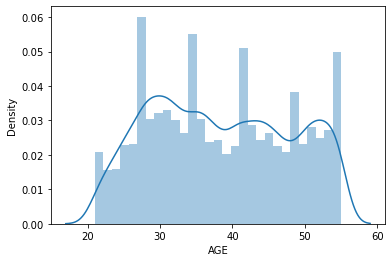

In [30]:
sns.distplot(df['AGE'])

We see that the 'AGE' column is not normally distributed. We will need to check the Mean and Variance, in order to assume normality in the Whole Population.

In [31]:
print('Mean: {}\nVariance: {}'.format(df['AGE'].mean(),df['AGE'].var()))

Mean: 38.412910699241785
Variance: 91.9572404979501


We can see that 'AGE' has a countable Mean and Variance. So we will use CLT to assume that the population to have uniform distribution and carry on with our analysis.

Next, we will find outliers in our 'AGE' column by plotting a boxplot

<AxesSubplot:xlabel='AGE'>

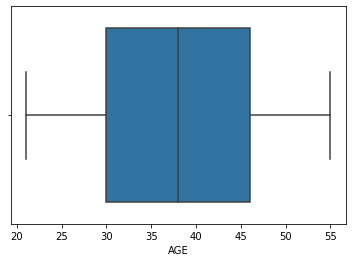

In [32]:
sns.boxplot(df['AGE'])

We see that AGE has no outliers, has a min of 21, max of 55 and a median of 38

###### BALANCE

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

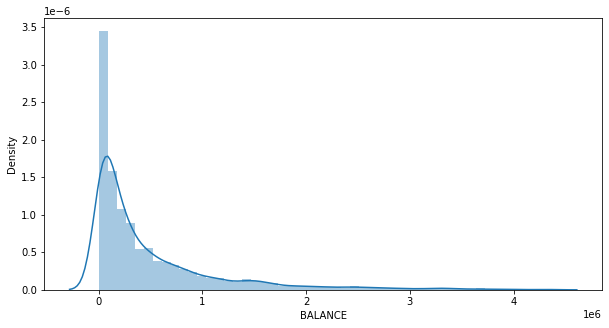

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df['BALANCE'])

We see that 'BALANCE' is heavily right-skewed implying that most people have a balance of around 0 to low 10,000s.

Using CLT, we can assume normality here as well.

<AxesSubplot:xlabel='BALANCE'>

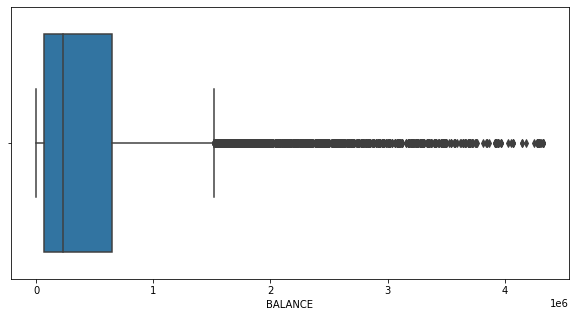

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(df['BALANCE'])

We see that alot of people have low balance but there are a huge number of people with high balance as well. This means that we can target those with high balance to take loans, if they haven't yet!

#### Looping through the Numerical Columns

In [35]:
col_list = ['HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR','AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_L_DR']

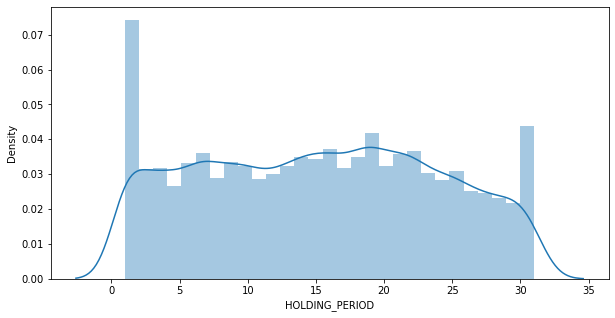

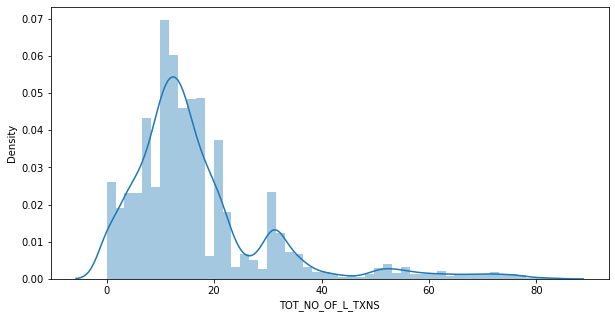

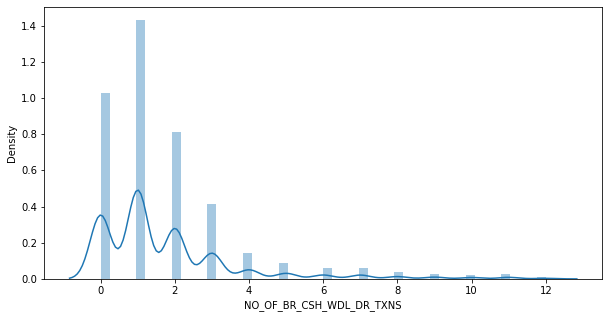

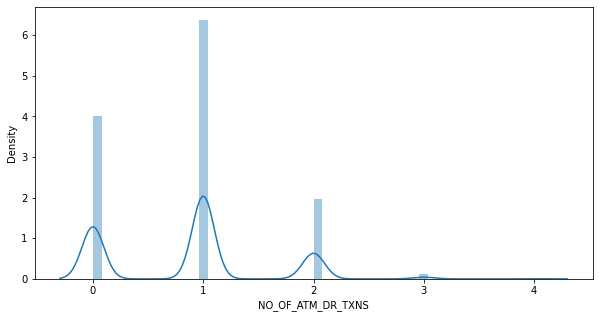

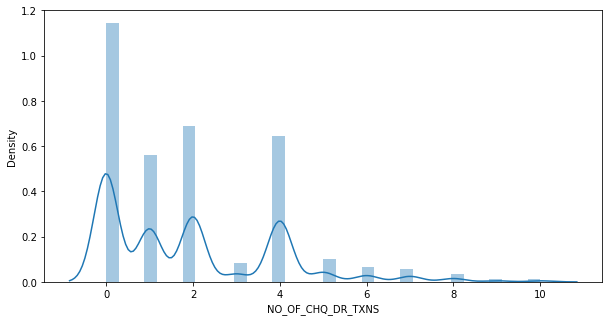

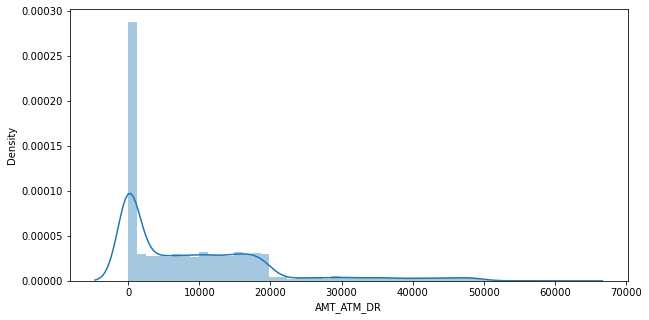

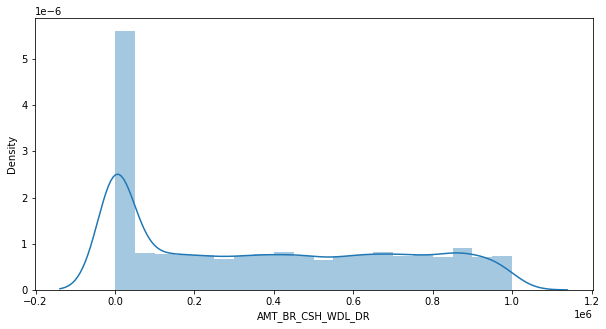

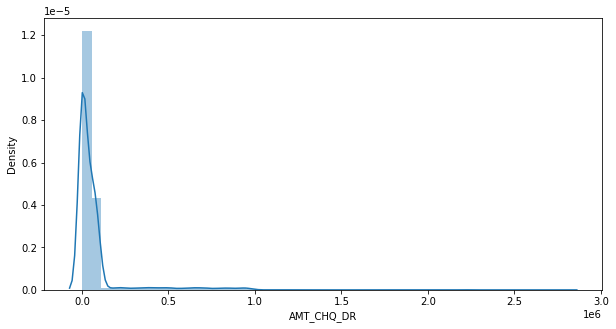

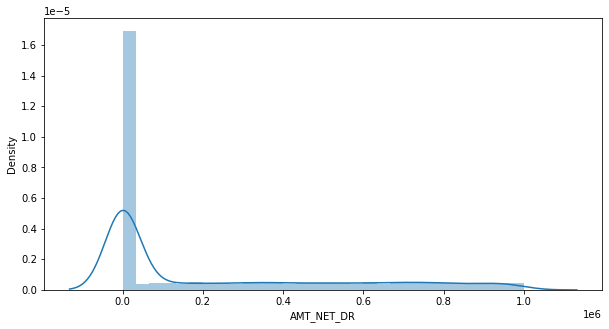

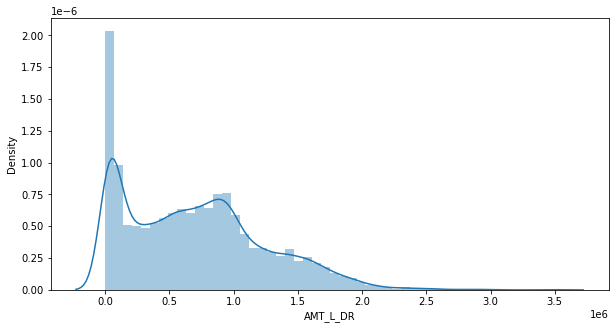

In [36]:
for col in col_list:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])
    plt.show()

#### Count Graphs

- All the other graphs are rightly skewed, so we can assume normality using CLT here as well.
- We realize that all of their variances, though high, are countable.
- We also realize that alot of these columns are counts and can be used as categories when needed. They are not all continuous but countable discreets.
    - HOLDING_PERIOD
    - NO_OF_ATM_DR_TXNS
    - NO_OF_BR_CSH_WDL_DR_TXNS
    - TOT_NO_L_TXNS
    
#### Other Graphs

- We see most of the other graphs have their medians at 0 while being heavily right skewed. We will have to see whether they are noisy data or important columns

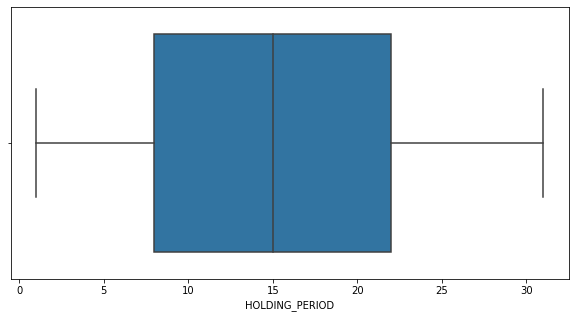

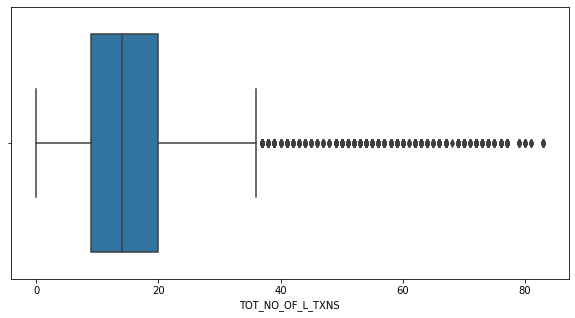

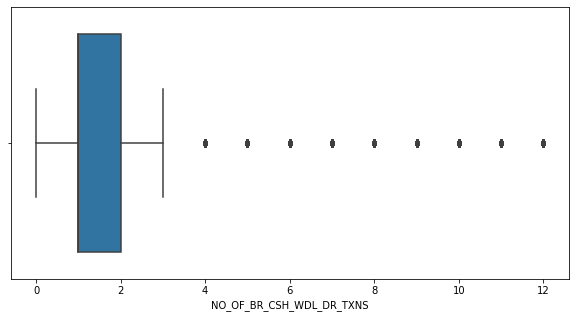

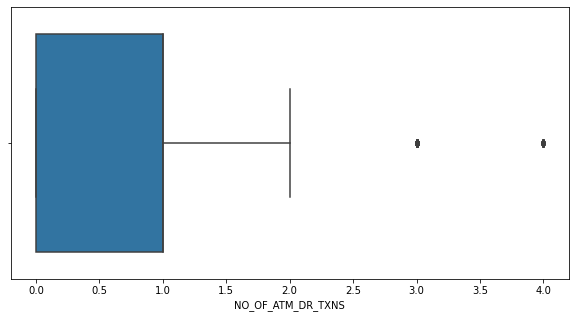

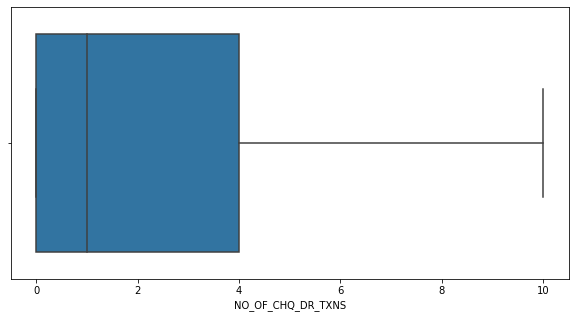

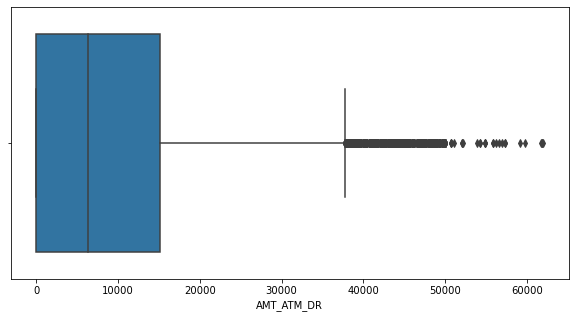

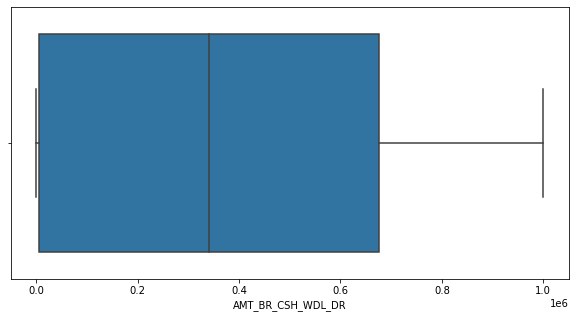

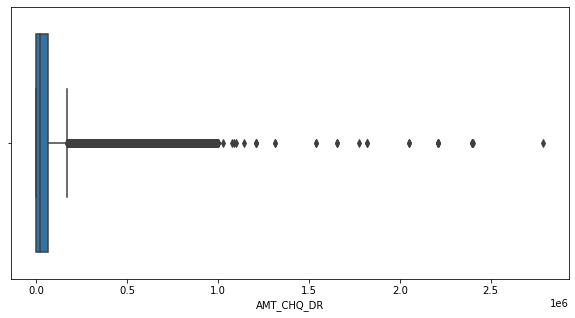

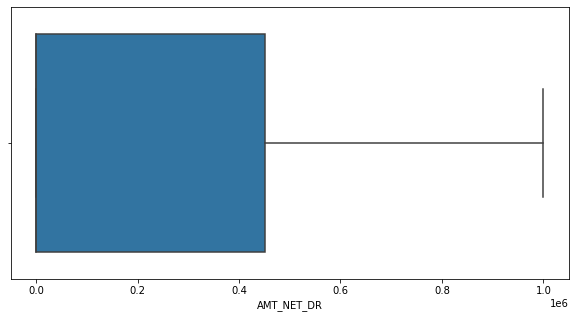

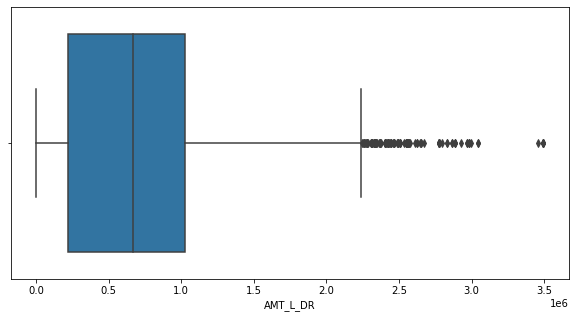

In [37]:
for col in col_list:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col])
    plt.show()

Most of these Outliers are from the Counter Columns, but many like 'AMT_ATM_DR' and other continuous columns have outliers as well. These are just points where people spend alot of money.

***

### Categorical Columns

- There are some columns that are unique to each customer and so we will skip them for analysis.
    - CUST_ID
    - ACC_OP_DATE
    - AGE_BKT

In [38]:
categorical_cols.remove('CUST_ID')
categorical_cols.remove('ACC_OP_DATE')
categorical_cols.remove('AGE_BKT')

categorical_cols

['GENDER', 'OCCUPATION', 'ACC_TYPE']

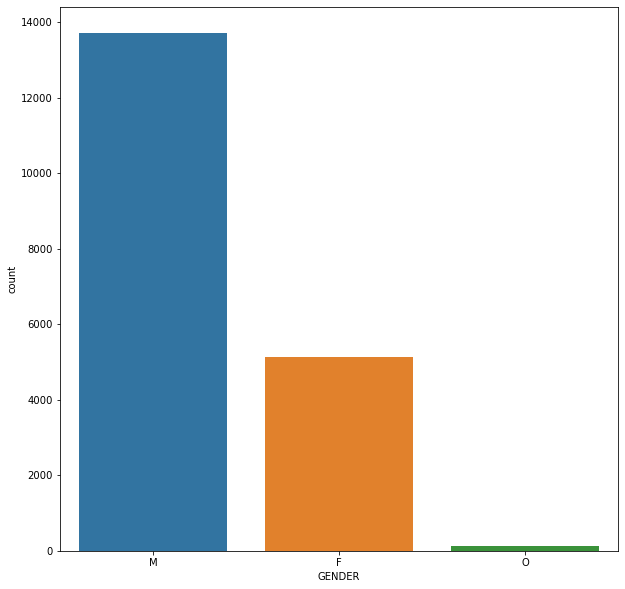

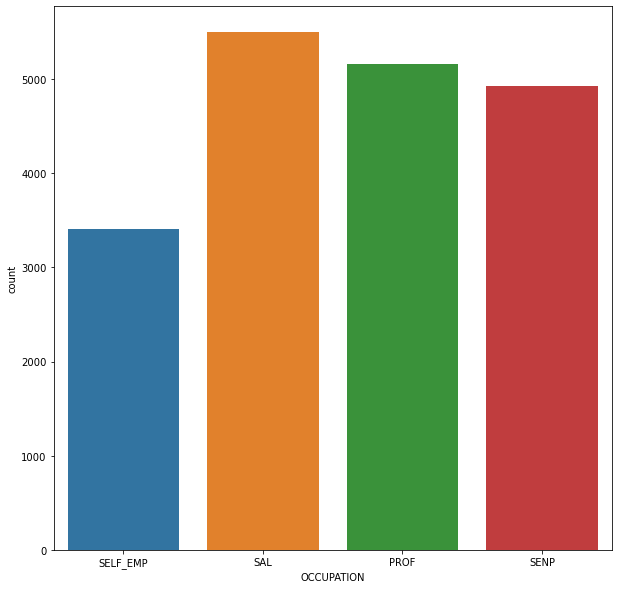

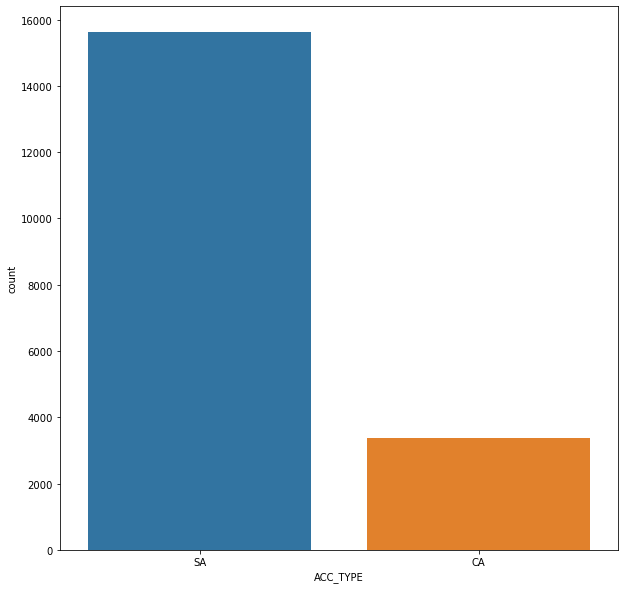

In [39]:
for col in categorical_cols:
    plt.figure(figsize=(10,10))
    sns.countplot(df[col])
    plt.show()

#### GENDER

- We see that the 'GENDER' is biased as most members are MALE.
- We also see that the contribution of 'OTHER' category is pretty negligeble.

#### ACC_TYPE

- We see that most people are in the working class getting a salary, thus SAL.

#### OCCUPATION

- We see that 'OCCUPATION' is more evenly distributed.
- Self-Employed people have the least count but they are not that far away in numbers.

***

### Multivariate Analysis

#### Checking group of columns' Relationship with the 'TARGET' Column

##### AGE, AGE_BKT and BALANCE with TARGET

<AxesSubplot:xlabel='AGE_BKT', ylabel='BALANCE'>

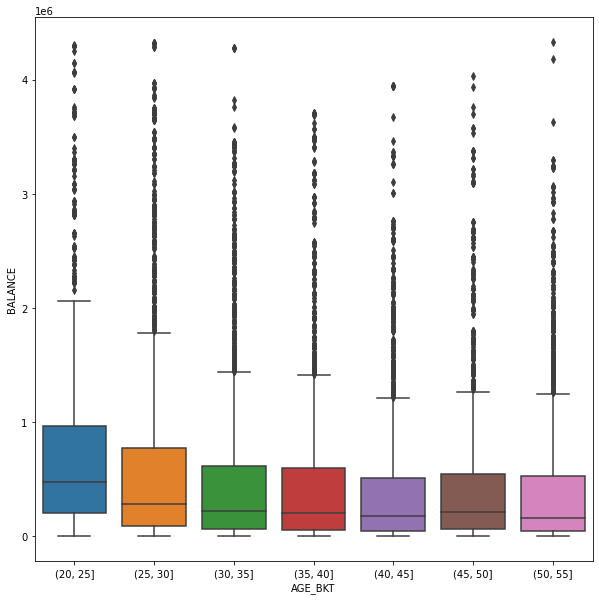

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'AGE_BKT', y = 'BALANCE', data = df)

We see that most people who have really high balance are in the 30-35 Group.

The least varied group is the 30-35 Group.

<AxesSubplot:xlabel='AMT_BR_CSH_WDL_DR', ylabel='BALANCE'>

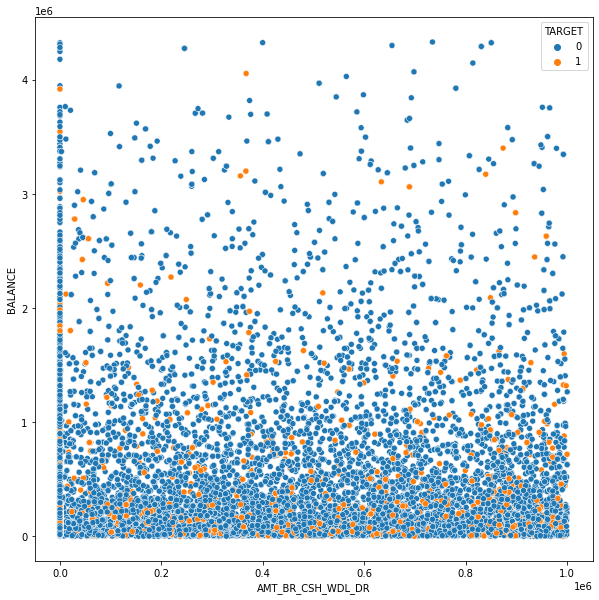

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'AMT_BR_CSH_WDL_DR', y = 'BALANCE', data = df, hue = 'TARGET')

We don't see a relationship between 'AMT_BR_CSH_WDL_DR' and 'BALANCE'.<br>
The few things that can be inferred are:
   - Most people with lower balance withdrew cash. This is something we want to look at later.
   - As the balance increases, people reduce withdrawing cash. There are exceptions of course.
   - Most of the people who take personal loans would lie in the Lower Balance Group, Maybe we can use this.


<AxesSubplot:xlabel='NO_OF_CHQ_DR_TXNS', ylabel='BALANCE'>

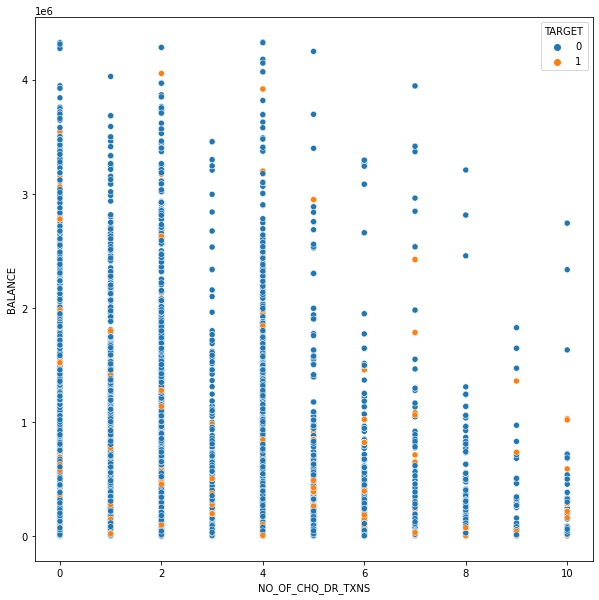

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'NO_OF_CHQ_DR_TXNS', y = 'BALANCE', data = df, hue = 'TARGET')

Again, We see that the Lower Balance Group make Less Cheque Transactions.

<AxesSubplot:xlabel='AMT_ATM_DR', ylabel='BALANCE'>

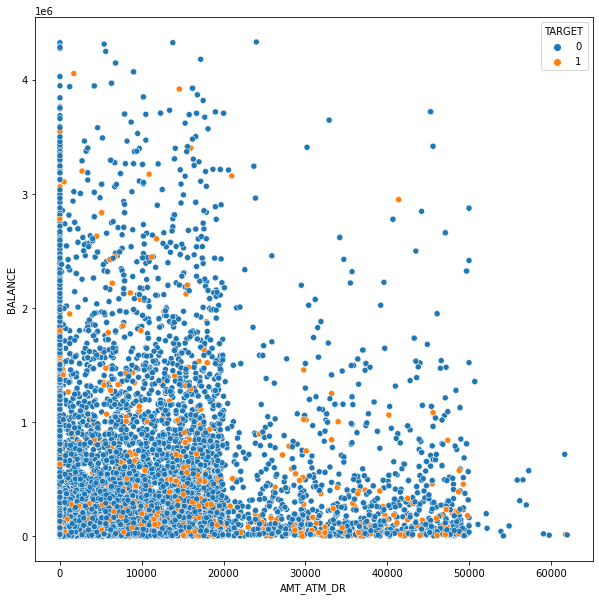

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'AMT_ATM_DR', y = 'BALANCE', data = df, hue = 'TARGET')

Here we see that the lower income people perform more ATM transactions, so its safe for us to assume they may take loans.

<AxesSubplot:xlabel='OCCUPATION', ylabel='BALANCE'>

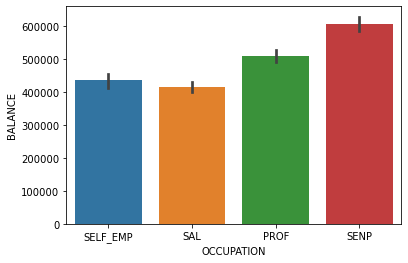

In [44]:
sns.barplot(x = df['OCCUPATION'], y = df['BALANCE'])

This graph tells us that people on Pensions hold the Most balance while those on SALARY hold the least.

#### Creating a Dataframe with TARGET = 1 and TARGET = 0, for better analysis of the people who responded positively when presented the Offer

In [45]:
non_target_df = df.loc[df['TARGET'] == 0]
target_df = df.loc[df['TARGET'] == 1]

print("'TARGET = 1' Dataframe Shape: '",target_df.shape)
print("'TARGET = 0' Dataframe Shape: '",non_target_df.shape)

'TARGET = 1' Dataframe Shape: ' (2314, 43)
'TARGET = 0' Dataframe Shape: ' (16678, 43)


<AxesSubplot:xlabel='OCCUPATION', ylabel='count'>

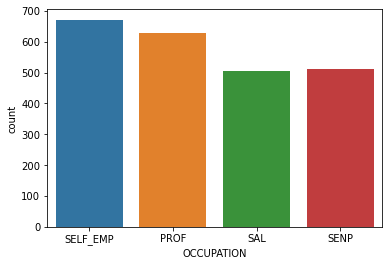

In [46]:
sns.countplot(target_df['OCCUPATION'])

We can see that Self-Employed People are more susceptible to take Personal Loans.

<AxesSubplot:xlabel='OCCUPATION', ylabel='count'>

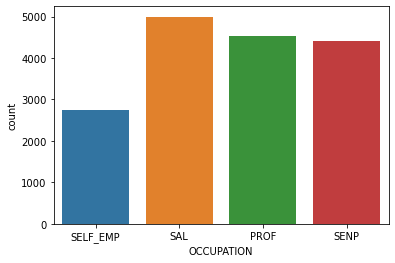

In [47]:
sns.countplot(non_target_df['OCCUPATION'])

People belonging to the 'SAL' column are less susceptible to take loans as they have a steady source of income.

<AxesSubplot:xlabel='AGE_BKT', ylabel='count'>

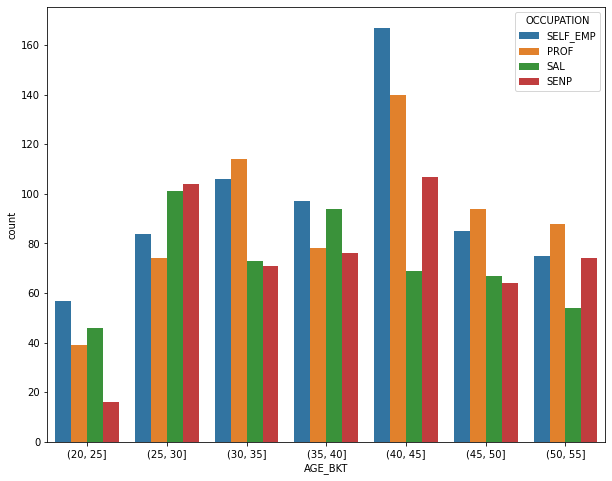

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(target_df['AGE_BKT'], hue = target_df['OCCUPATION'])

We see that:

- Self Employeed People of the Age 40-45 are the ones who are most susceptible to take Personal Loans.
- The least number of people who want to take loans are people of Age 20-25, probably because it is early in their career. But even in that age braket, self-Employeed people are the ones who are taking loans

<AxesSubplot:xlabel='AGE_BKT', ylabel='count'>

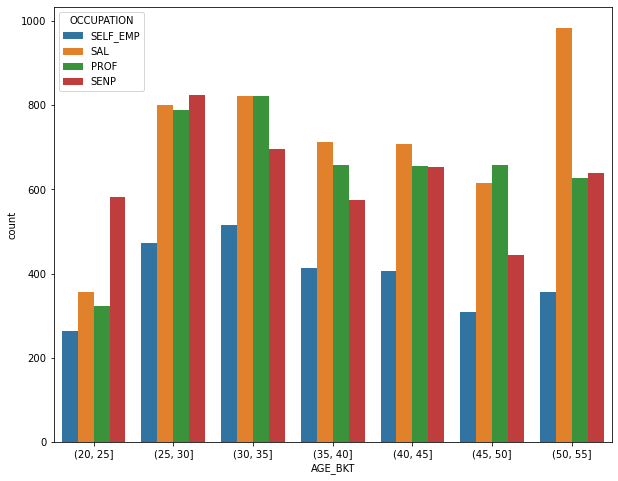

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(non_target_df['AGE_BKT'], hue = non_target_df['OCCUPATION'])

We see that:

- Professionals are not usually interested in taking loans.
- Very small number of professionals take loans in the Age 50-55 Group.
- The size of Self-Employed People who don't take loans is really low.

<AxesSubplot:xlabel='HOLDING_PERIOD', ylabel='count'>

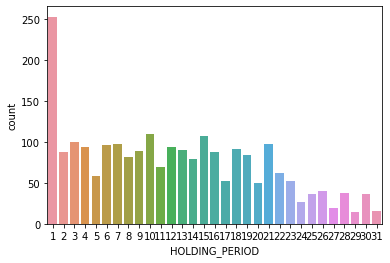

In [50]:
sns.countplot(target_df['HOLDING_PERIOD'])

<AxesSubplot:xlabel='HOLDING_PERIOD', ylabel='count'>

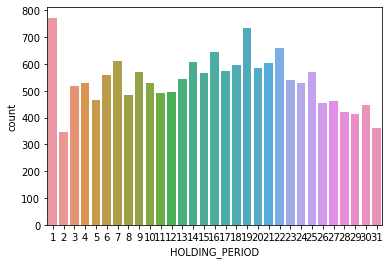

In [51]:
sns.countplot(non_target_df['HOLDING_PERIOD'])

<AxesSubplot:xlabel='HOLDING_PERIOD', ylabel='count'>

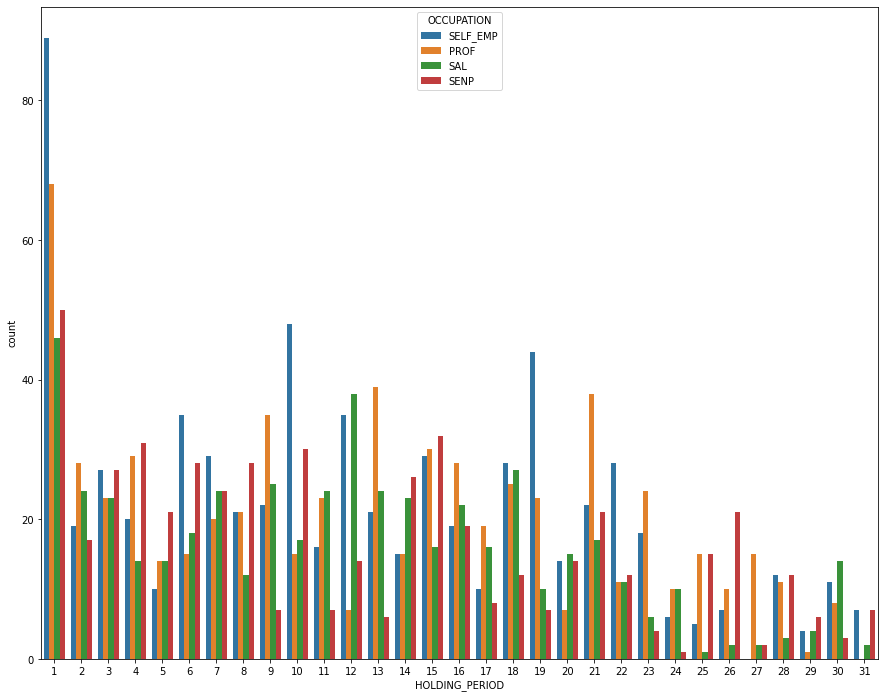

In [52]:
plt.figure(figsize=(15,12))
sns.countplot(target_df['HOLDING_PERIOD'], hue = target_df['OCCUPATION'])

- We see that Self-Employed with lower holding period take more loans.
- Most loans are taken when the holding period is 1.

<AxesSubplot:xlabel='FLG_HAS_OLD_LOAN', ylabel='count'>

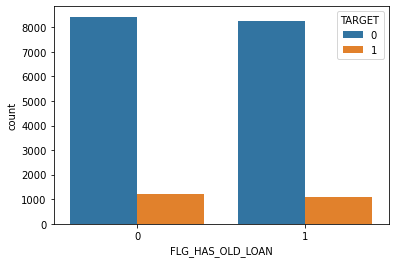

In [53]:
sns.countplot(df['FLG_HAS_OLD_LOAN'], hue = df['TARGET'])

<AxesSubplot:xlabel='FLG_HAS_OLD_LOAN', ylabel='count'>

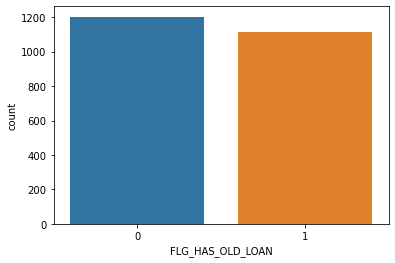

In [54]:
sns.countplot(target_df['FLG_HAS_OLD_LOAN'])

<AxesSubplot:xlabel='FLG_HAS_OLD_LOAN', ylabel='count'>

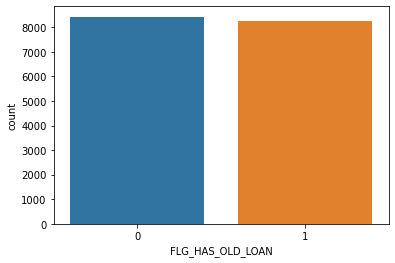

In [55]:
sns.countplot(non_target_df['FLG_HAS_OLD_LOAN'])

We see that having an old loan doesn't affect being interested in taking a second one much. This is weird as it should affect that decision.

<AxesSubplot:xlabel='FLG_HAS_CC', ylabel='count'>

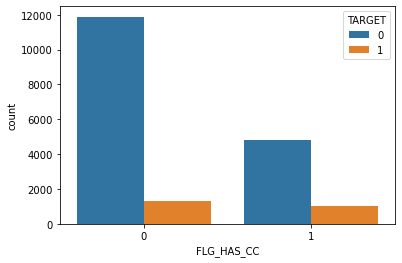

In [56]:
sns.countplot(df['FLG_HAS_CC'], hue = df['TARGET'])

<AxesSubplot:xlabel='FLG_HAS_CC', ylabel='count'>

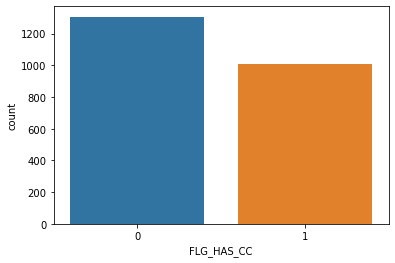

In [57]:
sns.countplot(target_df['FLG_HAS_CC'])

<AxesSubplot:xlabel='FLG_HAS_CC', ylabel='count'>

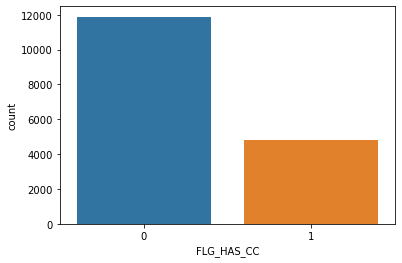

In [58]:
sns.countplot(non_target_df['FLG_HAS_CC'])

People with Credit Cards responded positively to the proposed scheme. However alot of people don't own credit cards

<AxesSubplot:xlabel='TOT_NO_OF_L_TXNS', ylabel='Density'>

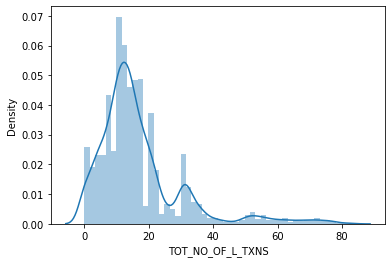

In [59]:
sns.distplot(df['TOT_NO_OF_L_TXNS'])

<AxesSubplot:xlabel='TOT_NO_OF_L_TXNS', ylabel='Density'>

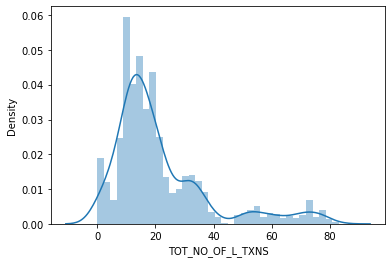

In [60]:
sns.distplot(target_df['TOT_NO_OF_L_TXNS'])

<AxesSubplot:xlabel='TOT_NO_OF_L_TXNS', ylabel='Density'>

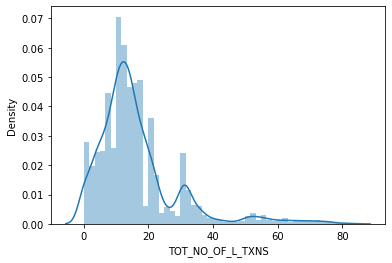

In [61]:
sns.distplot(non_target_df['TOT_NO_OF_L_TXNS'])

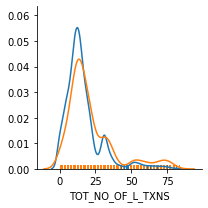

In [62]:
g = sns.FacetGrid(df, hue = 'TARGET')
g = g.map(sns.distplot, 'TOT_NO_OF_L_TXNS', hist = False, rug = True)

We see that the distributions of people who take and don't take loans are almost similiar. Also, these graphs are Right-Skewed, meaning the outliers are extremely large values

<AxesSubplot:xlabel='SCR', ylabel='Density'>

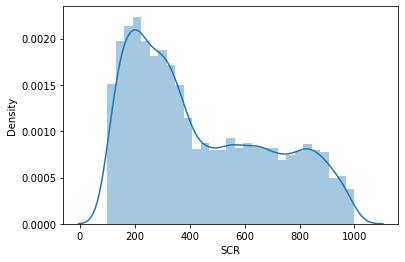

In [63]:
sns.distplot(df['SCR'])

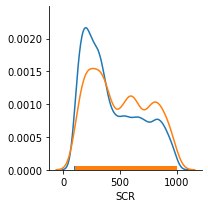

In [64]:
g = sns.FacetGrid(df, hue = 'TARGET')
g = g.map(sns.distplot, 'SCR', hist = False, rug = True)

Again, we see that the distributions are similiar but the counts are a little different because of the bias in the dataset.

AGE


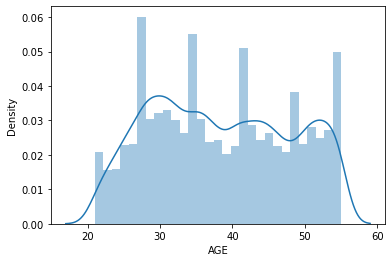

BALANCE


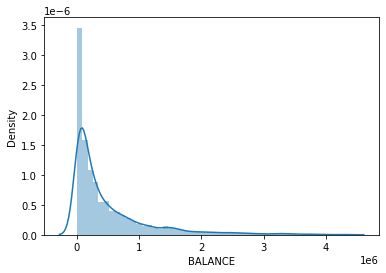

SCR


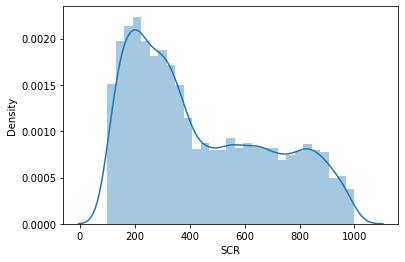

HOLDING_PERIOD


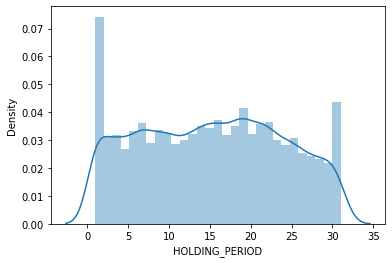

LEN_OF_RLTN_IN_MNTH


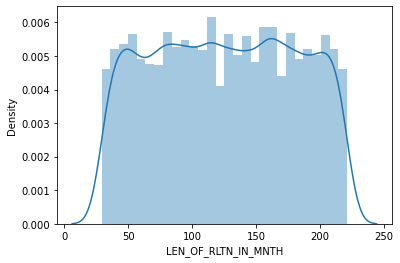

NO_OF_L_CR_TXNS


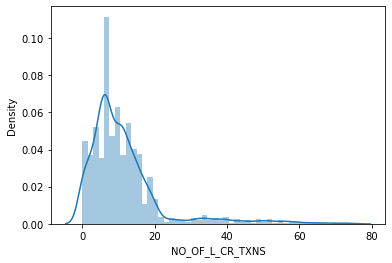

NO_OF_L_DR_TXNS


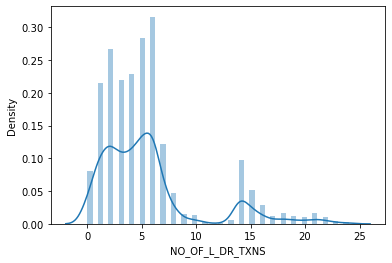

TOT_NO_OF_L_TXNS


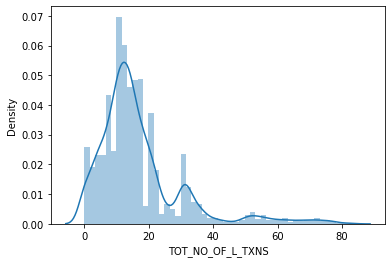

NO_OF_BR_CSH_WDL_DR_TXNS


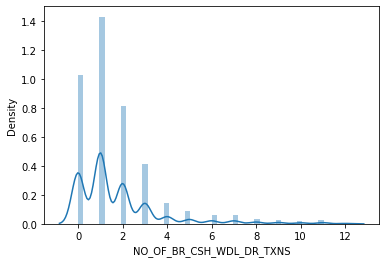

NO_OF_ATM_DR_TXNS


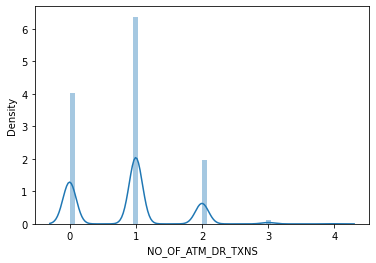

NO_OF_NET_DR_TXNS


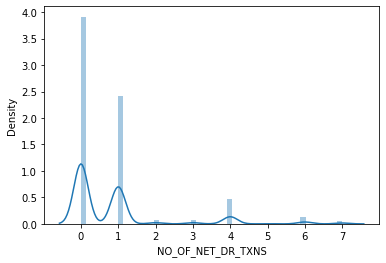

NO_OF_CHQ_DR_TXNS


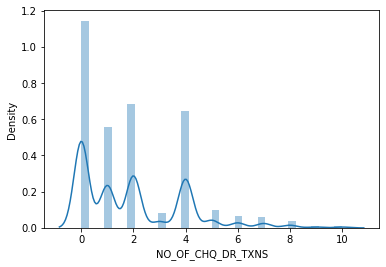

FLG_HAS_CC


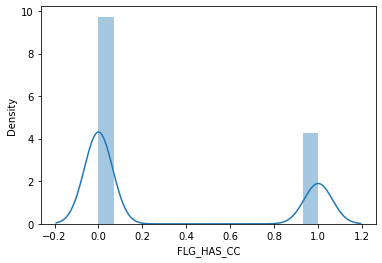

AMT_BR_CSH_WDL_DR


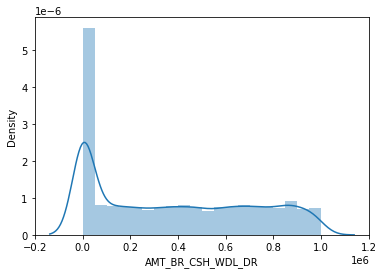

AMT_CHQ_DR


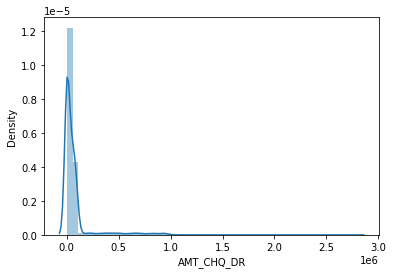

AMT_NET_DR


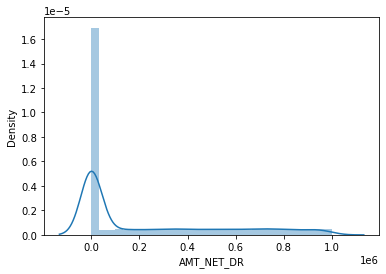

AMT_MOB_DR


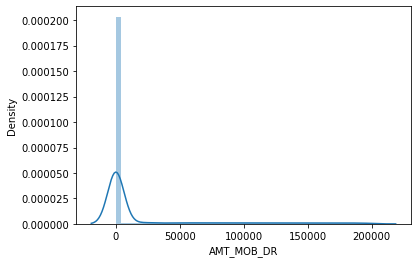

AMT_L_DR


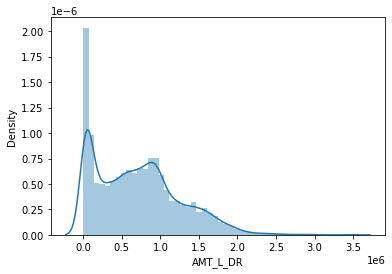

AMT_OTH_BK_ATM_USG_CHGS


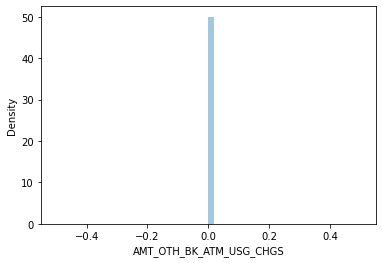

AVG_AMT_PER_ATM_TXN


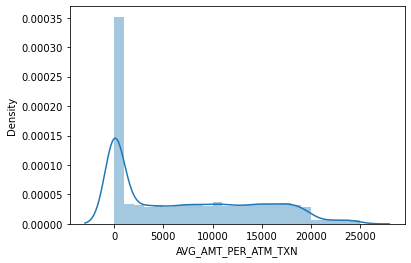

AVG_AMT_PER_CSH_WDL_TXN


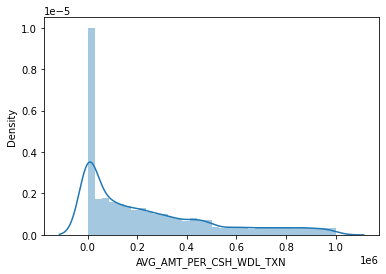

AVG_AMT_PER_CHQ_TXN


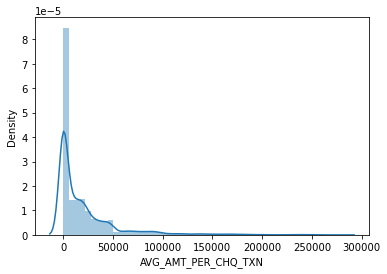

AVG_AMT_PER_NET_TXN


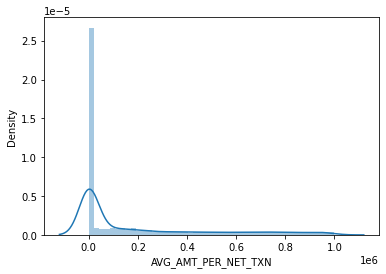

In [65]:
for i in num_cols:
    if i not in ['NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_MOB_TXN','FLG_HAS_NOMINEE']:
        print(i)
        sns.distplot(df[i])
        plt.show()

We see that all of the distributions are heavily right-skewed. But we can assume CLT as we have a large amount of datapoints in our sample and we can calculate the Mean and Variance.

In [66]:
bw_0_cols = ['NO_OF_MOB_DR_TXNS', 'AMT_ATM_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_MOB_TXN','FLG_HAS_NOMINEE']

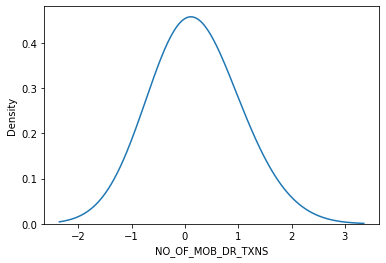

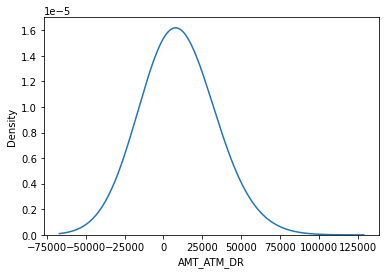

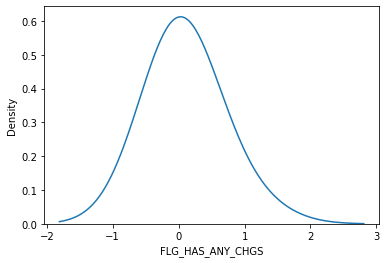

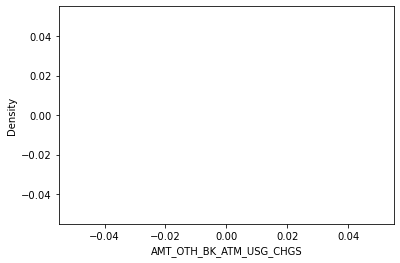

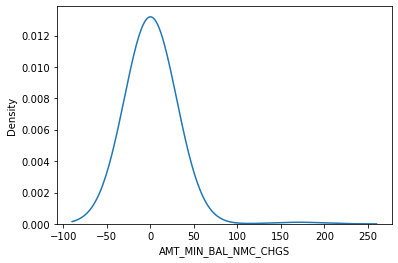

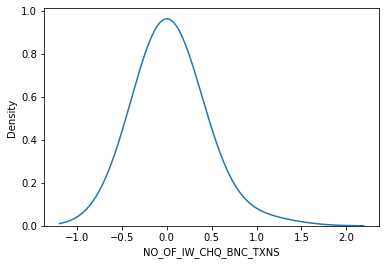

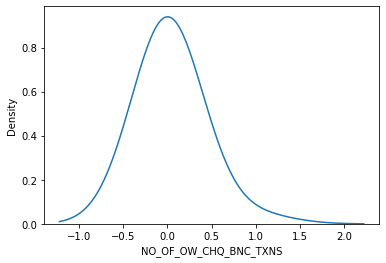

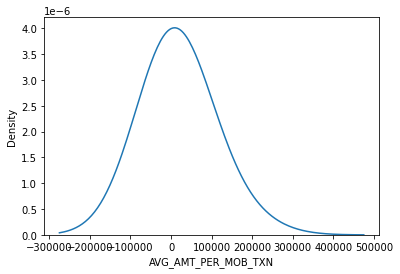

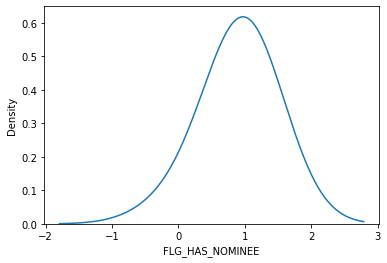

In [67]:
for i in bw_0_cols:
    sns.kdeplot(df[i], bw = 2)
    plt.show()

The above columns have their bandwidth as 0, (i.e) if the above columns are passed in distplot or kdeplot, the seaborn module will **NOT** be able to determine the bandwidth, hence we had to pass it manually.

Thus, we have performed the various types of analysis on the given dataset's columns with the 'TARGET' column and amongst themselves.

Now let us test the relationship between these columns and the 'TARGET' column using **Statistical Hypothesis Tests**

### Relationship with 'TARGET' Column for Categorical Columns

#### Chi-Squared Test for Categorical Columns

##### Hypothesis

H0 - The columns in cat_cols are independent of TARGET Variable <br>
Ha - The columns in cat_cols are dependent of TARGET Variable

In [68]:
cat_cols = ['GENDER', 'OCCUPATION', 'ACC_TYPE', 'AGE_BKT', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'AMT_FINED', 'CHQ_FINED']

In [69]:
from scipy.stats import chi2_contingency
def to_cr(df, col1):
    '''
    This function takes a dataframe and compares each column with the 'TARGET' column using Chi-Squared Test
    NULL: The 'TARGET' is dependent on the column
    Alternative: The 'TARGET' is Independent of the Column
    '''
    data = pd.crosstab(df[col1],df['TARGET'])
    stat,p,dof,expected = chi2_contingency(data)
    alpha = 0.05 #default value
    if p <= alpha:
        print('\n TARGET is dependent on {} (Reject NULL Hypothesis)'.format(col1))
    else:
        print('\n TARGET is independent on {} (Fail to Reject NULL Hypothesis)'.format(col1))

In [70]:
for i in cat_cols:
    to_cr(df, i)


 TARGET is dependent on GENDER (Reject NULL Hypothesis)

 TARGET is dependent on OCCUPATION (Reject NULL Hypothesis)

 TARGET is dependent on ACC_TYPE (Reject NULL Hypothesis)

 TARGET is dependent on AGE_BKT (Reject NULL Hypothesis)

 TARGET is dependent on FLG_HAS_CC (Reject NULL Hypothesis)

 TARGET is dependent on FLG_HAS_ANY_CHGS (Reject NULL Hypothesis)

 TARGET is independent on FLG_HAS_NOMINEE (Fail to Reject NULL Hypothesis)

 TARGET is independent on FLG_HAS_OLD_LOAN (Fail to Reject NULL Hypothesis)

 TARGET is independent on AMT_FINED (Fail to Reject NULL Hypothesis)

 TARGET is dependent on CHQ_FINED (Reject NULL Hypothesis)


From the Chi-Squared test, we can drop 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN' & 'AMT_FINED' as the 'TARGET' column is Independent of them.

### Relationship with 'TARGET' Column for Numerical Columns

#### ANOVA F Test for Categorical Columns

##### Hypothesis

H0 - The columns in cat_cols are independent of TARGET Variable <br>
Ha - The columns in cat_cols are dependent of TARGET Variable

In [71]:
from scipy.stats import f_oneway
def to_check(col1):
    '''
    This function takes a dataframe and compares each column with the 'TARGET' column using ANOVA F Test
    NULL: The 'TARGET' is dependent on the column
    Alternative: The 'TARGET' is Independent of the Column
    '''
    F,p = f_oneway(df[col1],df['TARGET'])
    alpha = 0.05 #default value
    if p <= alpha:
        print('\n TARGET is dependent on {} (Reject NULL Hypothesis)'.format(col1))
    else:
        print('\n TARGET is independent on {} (Fail to Reject NULL Hypothesis)'.format(col1))

In [72]:
df_num = df[['AGE', 'BALANCE','SCR' ,'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'TOT_NO_OF_L_TXNS', 'AMT_L_DR', 'TOT_NO_OF_DR_TXNS']]

In [73]:
for i in df_num.columns:
    to_check(i)


 TARGET is dependent on AGE (Reject NULL Hypothesis)

 TARGET is dependent on BALANCE (Reject NULL Hypothesis)

 TARGET is dependent on SCR (Reject NULL Hypothesis)

 TARGET is dependent on HOLDING_PERIOD (Reject NULL Hypothesis)

 TARGET is dependent on LEN_OF_RLTN_IN_MNTH (Reject NULL Hypothesis)

 TARGET is dependent on TOT_NO_OF_L_TXNS (Reject NULL Hypothesis)

 TARGET is dependent on AMT_L_DR (Reject NULL Hypothesis)

 TARGET is dependent on TOT_NO_OF_DR_TXNS (Reject NULL Hypothesis)


From the ANOVA F Test, we can see that the all the specified Numeric columns are dependent of the 'TARGET' column.

### Removing Columns

In [74]:
df.drop(labels = ['CUST_ID', 'random'], axis = 1, inplace = True)
df.drop(labels = ['AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS'], axis = 1, inplace = True)

Dropping the 'CUST_ID' column as it is not required, 'random' column as it is just random numbers and 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS'were combined into a single column 'AMT_FINED' so they are now redundant as well.

In [75]:
new_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns)
print(new_numeric)

['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN', 'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'AMT_FINED', 'CHQ_FINED', 'TOT_NO_OF_DR_TXNS']


We removed the columns with really high correlation.

### Feature Selection

In [76]:
cat_cols.append('TARGET') # Appending 'TARGET' column to categorical columns list
df_cat = df[cat_cols]

# One hot encoding some categorical columns
occ = pd.get_dummies(df['OCCUPATION'])
gen = pd.get_dummies(df['GENDER'])
acc_type = pd.get_dummies(df['ACC_TYPE'])

df_cat1 = pd.concat([occ,gen,acc_type],axis = 1)

In [77]:
for i in df_cat1.columns:
    df_cat[i] = df_cat1[i].values

In [78]:
df_cat.drop(labels=['OCCUPATION', 'GENDER', 'ACC_TYPE'], axis = 1, inplace = True) # Dropping the original columns after encoding

In [79]:
# Applying MinMax Scaling as it fits our data the best

mms = MinMaxScaler()
df_num_mms = mms.fit_transform(df_num)
df_num_mms = pd.DataFrame(df_num_mms, columns= df_num.columns)

In [80]:
df_final_mms = df_num_mms.copy()

In [81]:
df_final_mms.isna().sum()

AGE                    0
BALANCE                0
SCR                    0
HOLDING_PERIOD         0
LEN_OF_RLTN_IN_MNTH    0
TOT_NO_OF_L_TXNS       0
AMT_L_DR               0
TOT_NO_OF_DR_TXNS      0
dtype: int64

In [82]:
df_final_n_scaling = df_num.copy()

In [83]:
df_final_n_scaling.isna().sum()

AGE                    0
BALANCE                0
SCR                    0
HOLDING_PERIOD         0
LEN_OF_RLTN_IN_MNTH    0
TOT_NO_OF_L_TXNS       0
AMT_L_DR               0
TOT_NO_OF_DR_TXNS      0
dtype: int64

In [84]:
df_num1 = df_num.copy()

In [85]:
df_num1.var().sort_values()

TOT_NO_OF_DR_TXNS      2.226787e+01
HOLDING_PERIOD         7.429867e+01
AGE                    9.195724e+01
TOT_NO_OF_L_TXNS       1.861731e+02
LEN_OF_RLTN_IN_MNTH    3.021572e+03
SCR                    6.259260e+04
AMT_L_DR               2.957055e+11
BALANCE                4.497394e+11
dtype: float64

In [86]:
df_num1['AMT_L_DR'] = mms.fit_transform(df_num1[['AMT_L_DR']])

In [87]:
df_num1['BALANCE'] = mms.fit_transform(df_num1[['BALANCE']])

In [88]:
df_final_mms.drop(labels = ['AGE'], axis = 1, inplace = True)

In [89]:
df_final_mms['TARGET'] = df_cat['TARGET'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_final_mms.drop(columns = ['TARGET']), df_final_mms['TARGET'], test_size = 0.2, random_state = 42)

In [91]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15193, 7) (3799, 7) (15193,) (3799,)


<AxesSubplot:>

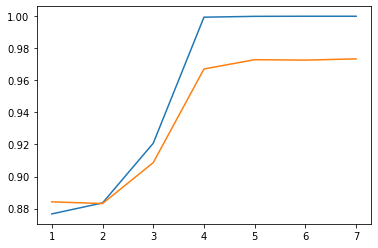

In [92]:
# Getting the columns and selecting the K-Best Features

column_names = df_final_mms.drop(columns = ['TARGET']).columns
no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(1,8,1): # This loop finds the best value for k, the number of features to predict the data.
    selector = SelectKBest(f_classif, k = k)
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.fit_transform(X_test, y_test)
    
    cf = ExtraTreesClassifier()
    cf.fit(X_train_transformed, y_train)
    
    no_of_features.append(k)
    
    r_squared_train.append(cf.score(X_train_transformed, y_train))
    r_squared_test.append(cf.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = full)
sns.lineplot(x = no_of_features, y = r_squared_test, legend = full)

We see that k = 4 gives the best results and so, we will pick that value.

In [93]:
selector = SelectKBest(f_classif, k = 4)

X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.fit_transform(X_test, y_test)

column_names[selector.get_support()]

Index(['SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'TOT_NO_OF_DR_TXNS'], dtype='object')

The 4 best features we got are:

- SCR: The generic marketing score that tells us how well an individual does when it comes to spending money and paying it back.

- HOLDING_PERIOD: It tells us how long before a person performs transactions. This is also intuitive as the more people spend, the more money they need. These are people who maybe interested in taking personal loans.

- TOT_NO_OF_L_TXNS:  The total number of Transactions which imply how many times people perform transactions. This can mean that their balance will become low, which may lead to them being interested in taking personal loans.

- TOT_NO_OF_DR_TXNS: The total number of Debit Transactions which imply how many times money is debited from their account. This in turn leads to them having lesser account balance and be interested in taking personal loans.

In [94]:
for i in df_cat.columns:
    df_final_mms[i] = df_cat[i].values

In [95]:
le = LabelEncoder()
df_final_mms['AGE_BKT'] = le.fit_transform(df_final_mms['AGE_BKT'])

In [96]:
df_final_mms.drop(labels = ['FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'], axis = 1, inplace = True)

In [97]:
X = df_final_mms[['BALANCE', 'SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'TOT_NO_OF_DR_TXNS','AGE_BKT' ,'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'CHQ_FINED', 'PROF', 'SAL', 'SELF_EMP', 'F', 'M', 'O', 'CA', 'SA']]
y = df_final_mms['TARGET']

### PCA

It is recommended to use Dimensionality Reduction techniques like PCA for Clustering Algorithms as they will make the data more linear

In [98]:
pca = PCA(0.95)
x1  = pca.fit_transform(X)

# We used 0.95 to get 95% of the information given by the data.

In [99]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Modelling and Evaluation

### (i) K-means Clustering

###### Process

1. First, n random centroids (we will specify them in the parameter) are assigned for the data points.
2. Then when the datapoints are assigned, the euclidian distance is calculated b/w randomly assigned centroid and new datapoints.
3. After Step 2, new centroids are assigned for those points.
4. These steps are repeated until n_clusters are formed.

###### To find the optimal number of clusters, we plot a graph called as the elbow plot. Using this plot, we can see where the graph line tends to stabilize and that point is marked as n_clusters for the K-Means algorithm

In [100]:
dd = X.to_numpy()

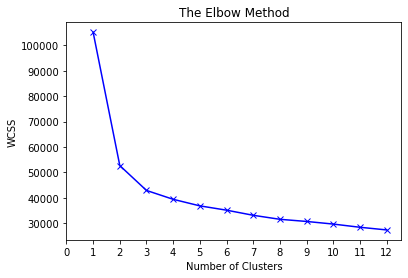

In [101]:
# This will calculate the Within Sum of Squares to help find the optimal value for K-Means Clustering
# We us init = 'k-means++' to avoid the bad initial cluster centroid problem

## Elbow Plot ##

wcss = []
for i in range (1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dd) # X is features
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,13), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('WCSS')
plt.show()

##### From the above graph, we can see that the graph starts stablizing after 5 No.of Clusters

In [102]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x1)

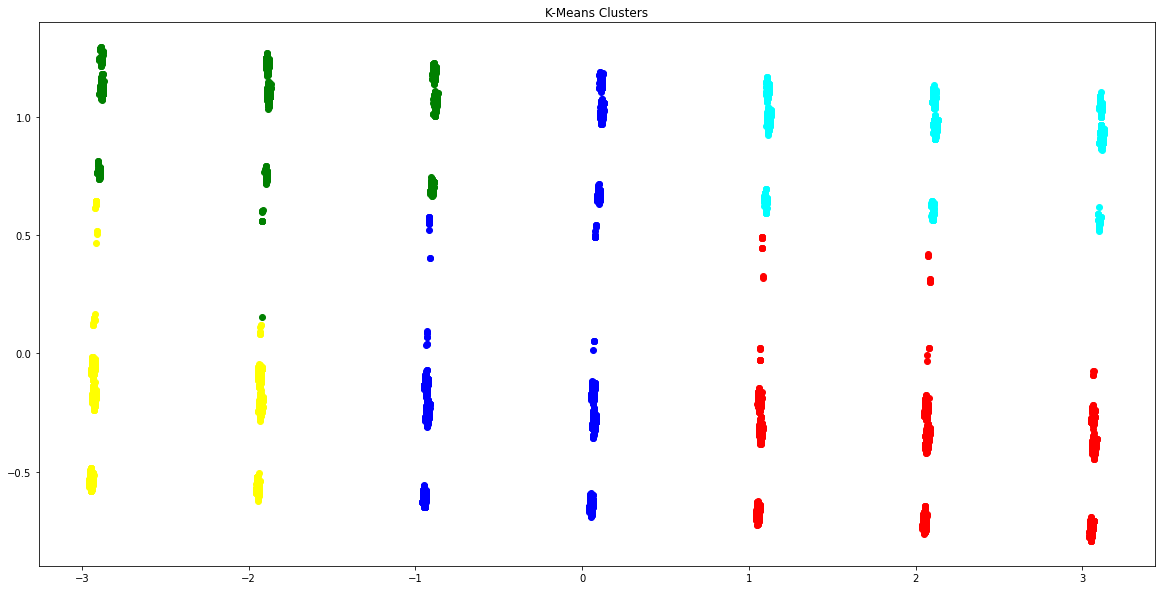

In [103]:
plt.figure(figsize = (20,10))

for i in range(0,x1.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(x1[i,0],x1[i,1],c='red')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(x1[i,0],x1[i,1],c='green')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(x1[i,0],x1[i,1],c='blue')
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(x1[i,0],x1[i,1],c='cyan')
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(x1[i,0],x1[i,1],c='yellow')
        
plt.title('K-Means Clusters')
plt.show()

The 2D plot is not intuitive so we shall try to plot a 3D graph and see how it goes.

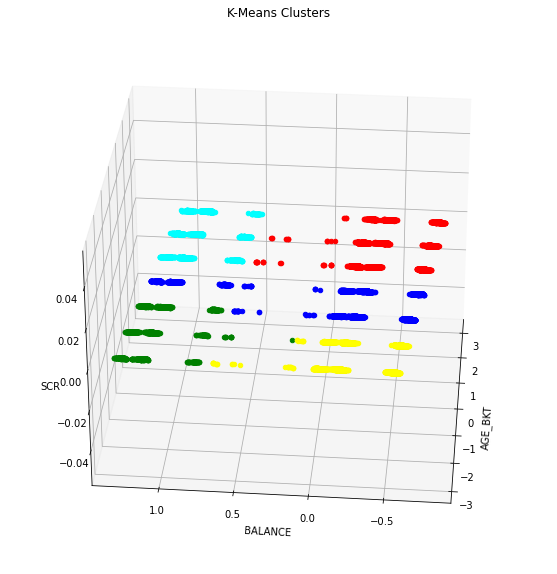

In [104]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(111, projection = '3d')

for i in range(0,x1.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = ax.scatter(x1[i,0],x1[i,1],c='red')
    elif kmeans.labels_[i] == 0:
        c2 = ax.scatter(x1[i,0],x1[i,1],c='green')
    elif kmeans.labels_[i] == 2:
        c3 = ax.scatter(x1[i,0],x1[i,1],c='blue')
    elif kmeans.labels_[i] == 3:
        c4 = ax.scatter(x1[i,0],x1[i,1],c='cyan')
    elif kmeans.labels_[i] == 4:
        c5 = ax.scatter(x1[i,0],x1[i,1],c='yellow')
        
plt.title('K-Means Clusters')
plt.xlabel('AGE_BKT')
plt.ylabel('BALANCE')
ax.set_zlabel('SCR')
ax.view_init(30, 185)
plt.show()

This also didn't prove to be useful. So, we will try to use other clustering algorithms to find profitable segments for our Bank.

***

### (ii) DBSCAN (Density-Base Spatial Clustering of Applications with Noise)

###### Process

1. There are 2 key words here, minimum points and epsilon
2. DBSCAN creates a circle of **epsilon** radius around every datapoint and classifies them into to **Core** point, **Border** point and **Noise**.
3. A datapoint is a **Core** point, if the circle around it contains atleast 'minPoints' number of Points.
4. If the number of points inside the circle of a datapoint is less than 'minPoints' then it is classified as a **Border** point.
5. If there are no datapoints around any datapoint within **Epsilon** radius, then it's treated as **Noise**
6. The main advantage of DBSCAN is that it has a notion of noise, and is robust to Outliers.


###### Here we also use a sklearn metric module called 'silhouette' which os nothing but a validation technique for clustering algorithms.

In [105]:
for n_clusters in range(2,9):
    c1 = KMeans(n_clusters, random_state = 42)
    cluster_labels = c1.fit_predict(x1)
    
    # The silhouette score will provide avg values for all samples.
    ## This gives us an idea about the density and seperation formed by clusters
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print('For n_clusters = {} The average silhouette score is = {}'.format(n_clusters,silhouette_avg))
    
    # Calculate the Silhouette score for each sample
    sample_silhouette_score = silhouette_samples(x1, cluster_labels)

For n_clusters = 2 The average silhouette score is = 0.41813165043473427
For n_clusters = 3 The average silhouette score is = 0.2897973870525826
For n_clusters = 4 The average silhouette score is = 0.21365465302723677
For n_clusters = 5 The average silhouette score is = 0.2162066017000652
For n_clusters = 6 The average silhouette score is = 0.19033558601697223
For n_clusters = 7 The average silhouette score is = 0.22393963662466507
For n_clusters = 8 The average silhouette score is = 0.20264063764456555


##### Hence, we can see that n_clusters = 2 is the optimal number of clusters

In [106]:
range_eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in range_eps:
        db = DBSCAN(eps = i, min_samples = 10).fit(x1)
        core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(x1, labels)
        
        print('For Epsilon Value = {} The Average Silhouette is: {}'.format(i, silhouette_avg))

For Epsilon Value = 0.1 The Average Silhouette is: 0.27641884303236697
For Epsilon Value = 0.2 The Average Silhouette is: 0.42563429546848186
For Epsilon Value = 0.3 The Average Silhouette is: 0.4794226973772525
For Epsilon Value = 0.4 The Average Silhouette is: 0.4978733368917227
For Epsilon Value = 0.5 The Average Silhouette is: 0.5072591494340212
For Epsilon Value = 0.6 The Average Silhouette is: 0.49484837763574946
For Epsilon Value = 0.7 The Average Silhouette is: 0.486308068040918
For Epsilon Value = 0.8 The Average Silhouette is: 0.4425522261548006
For Epsilon Value = 0.9 The Average Silhouette is: 0.27279824017980453
For Epsilon Value = 1 The Average Silhouette is: 0.11603675347104142


##### Here, we can see that the optimal eps value is 0.7

In [107]:
min_samp = [1,2,3,4,5,6,7,280,300,310,350,380,400,410,411,412]

for i in min_samp:
    print('min_samp_val = ',i)
    db = DBSCAN(eps = 0.7, min_samples = i).fit(x1)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    labels = set([label for label in db.labels_ if label >= 0])
    print('The clusters are : {}'.format(len(set(labels))))

min_samp_val =  1
The clusters are : 382
min_samp_val =  2
The clusters are : 335
min_samp_val =  3
The clusters are : 299
min_samp_val =  4
The clusters are : 273
min_samp_val =  5
The clusters are : 251
min_samp_val =  6
The clusters are : 241
min_samp_val =  7
The clusters are : 233
min_samp_val =  280
The clusters are : 10
min_samp_val =  300
The clusters are : 8
min_samp_val =  310
The clusters are : 7
min_samp_val =  350
The clusters are : 6
min_samp_val =  380
The clusters are : 3
min_samp_val =  400
The clusters are : 3
min_samp_val =  410
The clusters are : 3
min_samp_val =  411
The clusters are : 3
min_samp_val =  412
The clusters are : 2


##### The best min_sample value is 412 as it gives total number of clusters as 2 which we received at the beginning of the K-Means Algorithm.

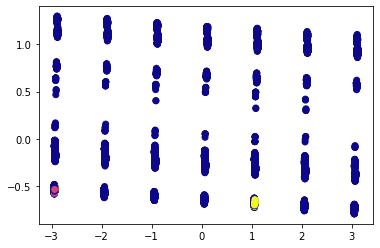

In [108]:
dbscan = DBSCAN(eps = 0.7, min_samples = 412)
clusters = dbscan.fit_predict(x1)
plt.scatter(x1[:,0], x1[:, 1], c = clusters, cmap = "plasma")

We are not able to intuite much from this clustering as well. We shall try a third clustering method.

***

### (iii) Hierarchial Clustering (Agglomerative Clustering)

##### Process

1. First there will be n clusters where n is the number of datapoints.
2. The algorithm will calculate the euclidean distance or dissimilarity between the nearest datapoints to form a cluster in order to give a total of n-1 clusters.
3. Furthermore, other datapoints will also perform the same method to form clusters giving us n-2 clusters in total.
4. Step 2 and Step 3 will be repeated until we get a single cluster.

### We use the Dendrogram to find the optimal number of clusters

##### We find that the number of clusters by identifying the longest vertical line which does not cut the extended or hypothetical horizontal line

##### We then cut that vertical line and see the number of lines it cuts, which gives us the number of clusters.

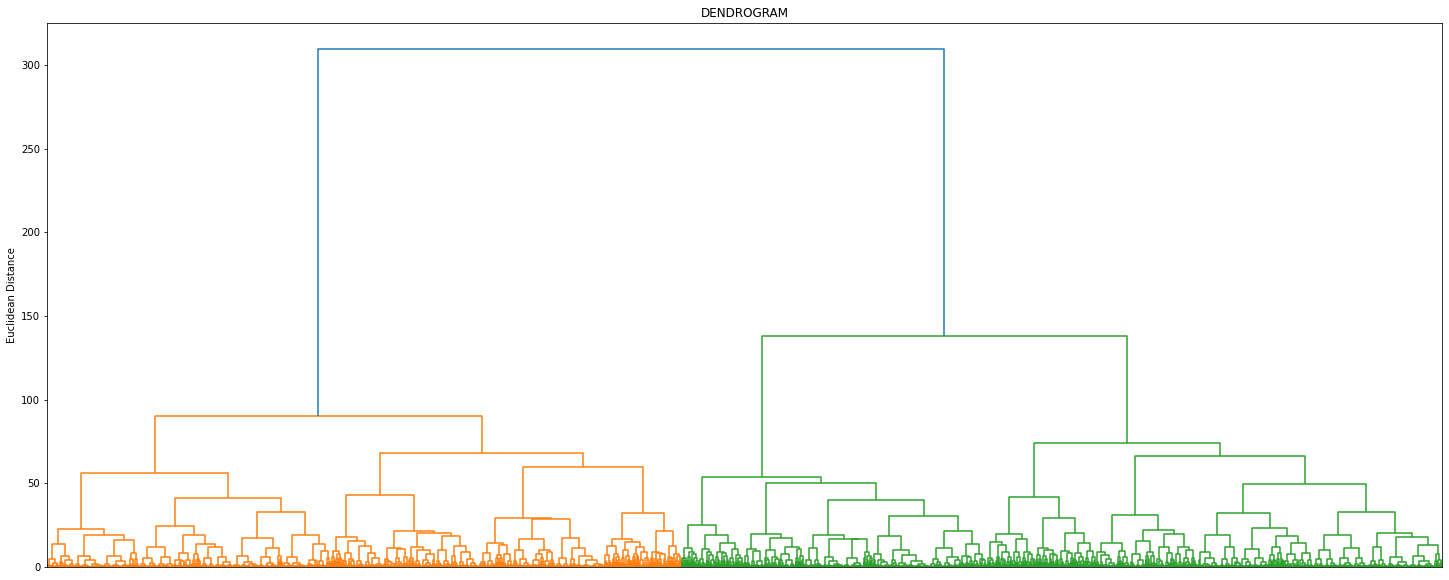

In [109]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))
plt.title('DENDROGRAM')
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Euclidean Distance')
plt.show()

From the above Dendrogram, we can obtain the number of clusters to be taken, which is **3.**

##### Applying Agglomerative Clustering Algorithm

In [110]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)

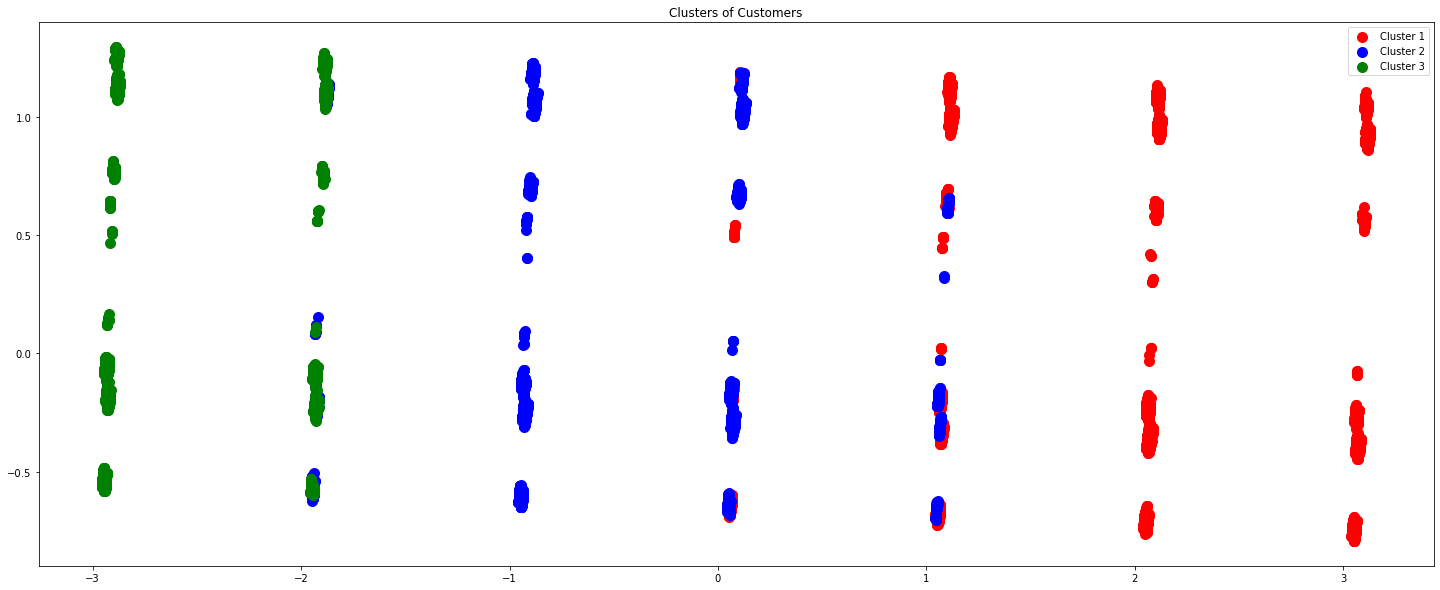

In [111]:
plt.figure(figsize = (25,10))
plt.scatter(x1[y_hc == 0, 0], x1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_hc == 1, 0], x1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_hc == 2, 0], x1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

#### Hierarchial Clustering seems to be the best option for Clustering in our case as:

- The dendrograms show us that the optimal number of clusters is 3.
- Each cluster signifies the customer segmentation we need to focus on.
- From our previous analysis, we saw the following things:
    - People with high 'SCR' should be targeted.
    - People with high 'BALANCE' should be targeted.
    - People with high 'HOLDING_PERIOD' should be targeted.
    
All of the above points were displayed by the cluster in green and that is our Target Segment.

Adding the Cluster column to our Dataframe, We will perform analysis based on 'CLUSTER' column as well.

In [112]:
clusters = pd.DataFrame(data = y_hc, columns = ['CLUSTER'])

df_final_mms['CLUSTER'] = clusters['CLUSTER'].values

<AxesSubplot:xlabel='TARGET', ylabel='count'>

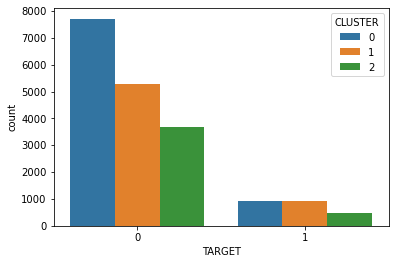

In [113]:
sns.countplot(x = 'TARGET', data = df_final_mms, hue = 'CLUSTER')

As we already have a biased dataset, we see that the clusters for the customers who were interested in the loan are low. However, we can also see that clusters 1 and 2 have near the same amount of customers.

<AxesSubplot:xlabel='CLUSTER', ylabel='BALANCE'>

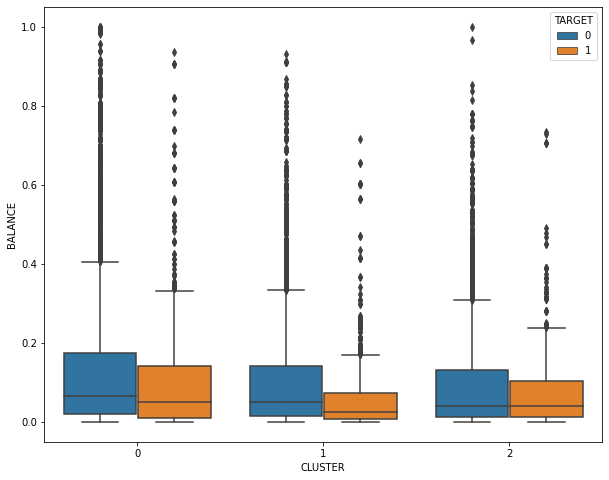

In [114]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'CLUSTER', y = 'BALANCE', data = df_final_mms, hue = 'TARGET')

We see that the people in cluster 0 (first cluster) have more balance on average and the number of customers who were interested have almost equivalent balance. This should be our Target Cluster. For the other Clusters, we might need to come up with different schemes.

In [115]:
df['CLUSTER'] = df_final_mms['CLUSTER']

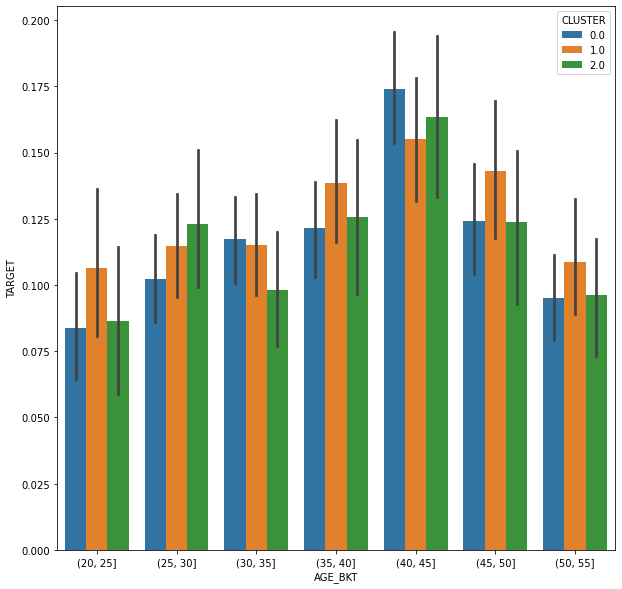

In [116]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'AGE_BKT', y = 'TARGET', data = df, hue = 'CLUSTER')
plt.show()

We see that, age group of 40-45 year olds have the most number of people and it has more people in Cluster 0.

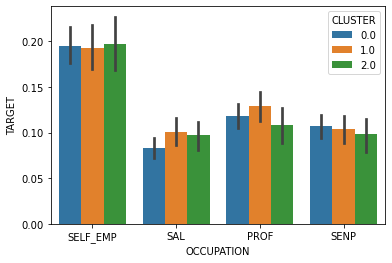

In [117]:
sns.barplot(x = 'OCCUPATION', y = 'TARGET', data = df, hue = 'CLUSTER')
plt.show()

We see that alot of people again belonging to the Self-Employed group and all the clusters are somewhat evenly distributed.

### Classification Models based on 'TARGET' Column

In [118]:
lr = LogisticRegression(random_state = 42)
lr.fit(train_X,train_y)
lrt_score = lr.score(train_X,train_y)
lr_score = lr.score(test_X,test_y)

In [119]:
dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
dtc.fit(train_X,train_y)
dtct_score = dtc.score(train_X,train_y)
dtc_score = dtc.score(test_X,test_y)

In [120]:
svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(train_X,train_y)
svct_score = svc.score(train_X,train_y)
svc_score = svc.score(test_X,test_y)

In [121]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X,train_y)
knnt_score = knn.score(train_X,train_y)
knn_score = knn.score(test_X,test_y)

In [122]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(train_X,train_y)
rft_score = rf.score(train_X,train_y)
rf_score = rf.score(test_X,test_y)

In [123]:
adb = AdaBoostClassifier(n_estimators = 50, random_state = 42)
adb.fit(train_X,train_y)
adbt_score = adb.score(train_X,train_y)
adb_score = adb.score(test_X,test_y)

In [124]:
ans_df = pd.DataFrame({'Algorithms':['Logistic Regression', 'Decision Tree', 'Support Vector', 'K Neighbors', 'Random Forest', 'AdaBoost'],'Training Accuracy':[lrt_score,dtct_score,svct_score,knnt_score,rft_score,adbt_score],'Testing Accuracy':[lr_score,dtc_score,svc_score,knn_score,rf_score,adb_score]})

In [125]:
ans_df

,Algorithms,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.876588,0.884443
1,Decision Tree,1.000000,0.948144
2,Support Vector,0.876654,0.884180
3,K Neighbors,0.960376,0.915767
4,Random Forest,1.000000,0.973414
5,AdaBoost,0.878957,0.888655


### Classfication Models based on 'CLUSTER' Column

In [126]:
X_clusters = df_final_mms[['BALANCE', 'SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'TOT_NO_OF_DR_TXNS', 'AGE_BKT', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'CHQ_FINED', 'PROF', 'SAL', 'SELF_EMP', 'SENP', 'F', 'M', 'O', 'CA', 'SA', 'TARGET']]
y_cluster = df_final_mms['CLUSTER']

In [127]:
train_X_cluster, test_X_cluster, train_y_cluster, test_y_cluster = train_test_split(X_clusters, y_cluster, test_size = 0.2, random_state = 42)

In [128]:
dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
dtc.fit(train_X_cluster,train_y_cluster)
dtct_c_score = dtc.score(train_X_cluster,train_y_cluster)
dtc_c_score = dtc.score(test_X_cluster,test_y_cluster)

In [129]:
svc = SVC(kernel = 'rbf', random_state = 42)
svc.fit(train_X_cluster,train_y_cluster)
svct_c_score = svc.score(train_X_cluster,train_y_cluster)
svc_c_score = svc.score(test_X_cluster,test_y_cluster)

In [130]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X_cluster,train_y_cluster)
knnt_c_score = knn.score(train_X_cluster,train_y_cluster)
knn_c_score = knn.score(test_X_cluster,test_y_cluster)

In [131]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(train_X_cluster,train_y_cluster)
rft_c_score = rf.score(train_X_cluster,train_y_cluster)
rf_c_score = rf.score(test_X_cluster,test_y_cluster)

In [132]:
adb = AdaBoostClassifier(n_estimators = 50, random_state = 42)
adb.fit(train_X_cluster,train_y_cluster)
adbt_c_score = adb.score(train_X_cluster,train_y_cluster)
adb_c_score = adb.score(test_X_cluster,test_y_cluster)

In [133]:
cluster_df = pd.DataFrame({'Algorithms':['Decision Tree', 'Support Vector', 'K Neighbors', 'Random Forest', 'AdaBoost'],'Training Accuracy':[dtct_c_score,svct_c_score,knnt_c_score,rft_c_score,adbt_c_score],'Testing Accuracy':[dtc_c_score,svc_c_score,knn_c_score,rf_c_score,adb_c_score]})

In [134]:
cluster_df

,Algorithms,Training Accuracy,Testing Accuracy
0,Decision Tree,1.000000,0.998947
1,Support Vector,0.985915,0.985259
2,K Neighbors,0.998815,0.998421
3,Random Forest,1.000000,0.997368
4,AdaBoost,0.872178,0.872861


## Conclusion

We had to find the profitable segments to cross-sell personal loans schemes to.
Our Data was heavily skewed but we can assume normality using the Central Limit Theorem.

We analyzed the data and found interesting Results:

  - Customers with High Balance were interested in taking loans.
  - Customers who make too many transactions are interested in taking loans.
  - Customers in the Self-Employed sector are interested in the Loan Scheme probably because they require additional capital for their businesses.
  - Holding Period is also an important feature in determining the segments. The lower the holding period, the higher is their chances of being interested in taking personal loans.
  - We found that people in their 30s and 40s and on the Professional or Self-Employed group are clearly interested in taking the loan.
  - Customers receiving Pensions have a High account Balance and hence aren't susceptible to taking much loans.
    
We then Clustered our data to find the important segments. We get **3** clusters and only one cluster seemed profitable within these constraints.

We found four features that seemed to be the most important: SCR, Holding Period, Total Number of Transactions and Total Number of Debit Transactions. We used these features in our Clustering.

We can just target customers in the cluster that had the most responses for our current personal loan plan. We will check for all the customers that fall under this cluster and send them promotions for this scheme. We should develop different plans that appeal to the other segments so that all of our customers have something that appeals to them. This will increase our market share and customer satisfaction.

Finally, we classified our customers based on their responses so that we can get to know if a customer will respond to the promotion or not. This can be scaled up to check for clusters and then target them.

For our models, we see that the Decision Tree and Random Forest Classifiers overfit on our Data. Logistic Regression, Support Vector Classifier and AdaBoost Classifier do not give satisfactory results. We see that K-Neighbors Classifier gives the best result without overfitting and that is the one we will use moving forward.

For the models to classify our clusters, we see that all the models overfitted except AdaBoost and Support Vector Classifier. AdaBoost gave us really low accuracy so we won't be using it. Support Vector Classifier gave us 98% accuracy and did not overfit and so, we will use that for classifying our clusters from here on out, if needed.

**For improving our business, we should find ways to include other customers for which, we might need to come up with different loan schemes**